In [137]:
import os
import tweepy as tw
import pandas as pd
import numpy as np
from collections import Counter
import gensim
import re
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%run "/Users/lorenzoflores/Desktop/Yale_Academic/Stat Projects/LDA Utils.ipynb" 

### Synthesio Data

In [2]:
data = pd.read_csv('online_class.csv')

In [3]:
data = data[data['Mention Content']!='Deleted or protected mention'].reset_index()

### Cleaning Text

In [4]:
import string

In [40]:
def preclean(inputString):
    inputString = re.sub(' +',' ',inputString)
    inputString = inputString.encode('ascii', 'ignore').decode('ascii')
    inputString = inputString.translate(str.maketrans('', '', string.punctuation))
    inputString = ' '.join([word for word in inputString.split() if 'http' not in word])
    return(inputString)

In [41]:
import string
def cleanList(lst):
    temp = []
    for word in lst:
        if (word[0]=='@') or (word[0]=='#'):
            pass
        else:
            x = word.translate(str.maketrans('', '', string.punctuation))
            temp.append(x.lower())
    x = ' '.join(temp)
    x = re.sub(' +',' ',x)
    return(x)


In [7]:
data['Mention Content'] = [preclean(item) \
                           for item in data['Mention Content']]
data['Mention Clean'] = [cleanList(item.split()) \
                         for item in data['Mention Content']]

### Initial LDA

In [77]:
def giveCounts(tweetList,p=False):
    lst = [item.split() for item in tweetList]
    count = Counter(list(itertools.chain.from_iterable(lst)))
    c = sorted(count.items(), key=lambda item: (-item[1], item[0]))
    if p:
        for item in c:
            print(item)
    return c

In [78]:
def giveTopN(tweetList,number=0,p=False):
    c = giveCounts(tweetList)
    if number==0:
        number = len(tweetList)
    top = []
    for item in c[:number]:
        top.append(item[0])
        if p:
            print(item)

    return top

In [10]:
top50 = giveTopN(data['Mention Clean'], 50)
for item in ['school','online','high','classes','covid19','class','so','not','will','about']:
    top50.remove(item)

In [11]:
for i in range(data.shape[0]):
    x = data['Mention Clean'][i].split()
    for word in top50:
        try:
            x.remove(word)
        except:
            pass
    data.loc[i,'Mention Clean'] = ' '.join(x)

In [13]:
data['processed'] = processedTweets(tokenList(data['Mention Clean']))
vocab = removeRares(data['processed'], 10)

In [14]:
id2word, word2id = buildIndexDicts(vocab)
data['tokens'] = tokenizeTweets(data['processed'], vocab)
corpus = buildCorpus(data['tokens'], word2id)

In [15]:
lda_model = ldaModel(corpus, id2word, 5)
fetchTable(lda_model, 5, 15, id2word)

    word rank topic 0 topic 1     topic 2  topic 3      topic 4
0           1  school  school      online   school          the
1           2      sa      to     classes        i       school
2           3      na     and          mo     high           of
3           4      ko    your        pero       so         high
4           5    kona     not          po     when         dont
5           6    miss   about    students       im          has
6           7      ng     you  quarantine     like           by
7           8     ang    they          ba        a          via
8           9      di     its       tapos       he  coronavirus
9          10    para      if          at      old    education
10         11     mag      go     medical    after       public
11         12   class      up        sana     love         even
12         13      ka      my     friends      her          new
13         14     nga     for        nung  youtube      college
14         15   naman    what      hahah

### Translation from Yandex

In [15]:
from yandex_translate import YandexTranslate


In [16]:

translate = YandexTranslate('')

print('Languages:', translate.langs)
print('Translate directions:', translate.directions)
print('Detect language:', translate.detect('Hello,world!'))
print('Translate:', translate.translate('Привет, мир!', 'ru-en'))  # or just 'en'

Languages: {'sl', 'es', 'sk', 'sq', 'uk', 'hr', 'az', 'et', 'nl', 'hu', 'sv', 'bg', 'lv', 'no', 'sr', 'el', 'mk', 'en', 'it', 'lt', 'de', 'cs', 'be', 'da', 'fi', 'fr', 'pl', 'ru', 'hy', 'ro', 'tr', 'pt', 'ca'}
Translate directions: ['az-ru', 'be-bg', 'be-cs', 'be-de', 'be-en', 'be-es', 'be-fr', 'be-it', 'be-pl', 'be-ro', 'be-ru', 'be-sr', 'be-tr', 'bg-be', 'bg-ru', 'bg-uk', 'ca-en', 'ca-ru', 'cs-be', 'cs-en', 'cs-ru', 'cs-uk', 'da-en', 'da-ru', 'de-be', 'de-en', 'de-es', 'de-fr', 'de-it', 'de-ru', 'de-tr', 'de-uk', 'el-en', 'el-ru', 'en-be', 'en-ca', 'en-cs', 'en-da', 'en-de', 'en-el', 'en-es', 'en-et', 'en-fi', 'en-fr', 'en-hu', 'en-it', 'en-lt', 'en-lv', 'en-mk', 'en-nl', 'en-no', 'en-pt', 'en-ru', 'en-sk', 'en-sl', 'en-sq', 'en-sv', 'en-tr', 'en-uk', 'es-be', 'es-de', 'es-en', 'es-ru', 'es-uk', 'et-en', 'et-ru', 'fi-en', 'fi-ru', 'fr-be', 'fr-de', 'fr-en', 'fr-ru', 'fr-uk', 'hr-ru', 'hu-en', 'hu-ru', 'hy-ru', 'it-be', 'it-de', 'it-en', 'it-ru', 'it-uk', 'lt-en', 'lt-ru', 'lv-en', 'l

In [17]:
translated = []
for i in range(data.shape[0]):
    print(str(i))
    try:
        result = translate.translate(data['Mention Content'][i], 'tl-en')['text'][0]
        translated.append(result)
        print(str(i)+'- Success: '+result)
    except:
        translated.append(None)
        print(str(i)+'- Fail')

0
0- Success: My ultimate lodi filmmaker John Red is Staying at home or going out are Not attending school or work and Not seeing anyone Spending time with the family will be absent a lockdownlinked a short film made in 2010 by Jon Red Produced by the ANC
1
1- Success: jst had a horrific time picking up food from the tesco masses of school-kids everywhere on the canal in small groups, they are just split into groups of 4 and when they spot a guard, it's fucking day 1 of the Phase1, and i should have stayed indoors omg
2
2- Success: Late Upload of our School Intrams swimming pool Games, Day 5, Part 1 Parlor Games-Day 5-Part 2 Dont forget to like and subscribe
3
3- Success: Is antibodytesting the key to getting the kids back in school Or Daycare, Or in the arms of their grandparents realDonaldTrump NYGovCuomo GovJanetMills CDCgov covid19
4
4- Success: billieeilish We would your help in sharing this video ThisIsMyBrave is seeking a high school mentalhealth ROCK STARS who are willing to sh

40- Success: 12 Feel free to share Due to the Covid of the Good Shepherd sisters have practically no sales If youre around and BACKED up and you want their treats, positive call-to-order and pick them up at the gate of the convent located after the Katipunan MRT station, St. Bridget School Aurora Blvd QC
41
41- Success: gretchenho and It doesnt feel right to open schools during this time, especially since we are very unprepared to effectively combat the spread of the disease, I believe is a lost school year is way better than a lost life
42
42- Success: JosephMorong What about those who are retirees, students and children below the school, and those who show a dealer How will they get tested and Can help SMEs to afford the testing of their employees
43
43- Success: Tangina, you really ncov think but I will wear SHS uniform but the rest of my life best nakapalda the papasokk CAUGHT, so he irerequired to the uniform paren market the online class, HE
44
44- Success: Ronald had a crush on 

78- Success: the kids love me too 5 I am a graduate of Elementary Education but I am teaching in a Senior High School student, and my real designation is an Instructor in the college of Your turn MydayNewbie oohhazelmay sungjinssmile eomdae bobjjaeseyo
79
79- Success: Teach Inspire and Change Lives Come and embrace the Atenean's way-For more information visit us at School of Education, Ateneo de Zamboanga University
80
80- Success: Washing your hands is the new norm the Girl that you are nagkinder Long time that teaching in the school, even though you're always there to say something when you're not old enough yet About the different hugaskamay you know
81
81- Success: I work for a school and Were trying our best to pay employees despite the limited cashflow Trying to develop the online classes, We are one of the last to properly function when the game is finished and we have the magpapatest of the employees not having a clue What to Unli money in the private sector
82
82- Success: Hel

120- Success: Why do you need to the online classes when you have some indians, and a youtube video hahaha
121
121- Success: setting up an online enrollment platform, where the stranded students have to send the needed information to include their personal details as the current location, the destination's health form and school ID or proof of enrollment and parental consent if the minor is to be tested for COVID19
122
122- Success: Hoping that I am concern is that will am with you sir on the school's moussaka with admin and finance to lusngo enin life ta the as if that's the style Line that you say but the way you just have found the same loophole Mulaong raba daun last boss, same as the teachers
123
123- Success: someone else in the school pretty well is because I like breathing the day I was born
124
124- Success: To those who have not voted for the OPERATIVE Elections, we will be reopening the votings today through the Aralinks site, Remember to vote wisely in Grades 79, of School 

160- Success: Hayst i have a problem with my school, we have to pass this semester, but also i feel sad about the fact that the last JK huhu can you please leave my precious tannies fucking, All I can do now is just hope and pray for you guys to Keep on Fighting the good BTStwt
161
161- Success: It's been what 13 years since I've been out of out of high school, there should be no and I mean no reason why some of these girls, you still have to eff up wigsweaves I had back in high school lmfao I cant believe it
162
162- Success: Just thinking about the fact that the rising annual tuition fees of children in grade school and high school to college is enough to make me NOT want a child
163
163- Success: like for a name, I had a crush on this person Before you now is no longer how long I've known in 2 years when i met the school's most beautiful feature, but the cheek looks like he is because his friendship is the best characteristic good-natured but amateur this is the last time we talked 

196- Success: realDonaldTrump Bwahahaha Navarros couldnt school a kindergartner
197
197- Success: BTStwt We arrive, Are welcome in the school
198
198- Success: TRIPLE TREAT Online Classes for DigitalMarketing Training to Avail of the three 3 in the series of our Digital Marketing Training Program, DMTP for only 35000 pesos, what is the fee INCLUSIVE OF 1 Video-the 3 Digital
199
199- Success: TRIPLE TREAT Online Classes for DigitalMarketing Training to Avail of the three 3 in the series of our Digital Marketing Training Program, DMTP for only 35000 pesos, what is the fee INCLUSIVE OF 1 Video-the 3 Digital
200
200- Success: Hey man Love gale in the laptop to the college on How to be just, I know mastart online class AAAAAHHHHH
201
201- Success: Stay at home and be updated on The School of Midwifery Library, gathered news clippings, to keep you abreast with all you need to know about the COVID19 to Access the document through this link BeatCOVID19 SOMLibrary
202
202- Success: A Quick Mess

237- Success: markcojuangco MIRAienda bebemomoy RexSingson According to the John Hopkins School of PH 7080 of your pop should be infected for herd immunity, So thats the 88 million filipinos, that With the current 65 the mortality rate in the PH, that would mean death to the 57 million Filipinos, Are we willing to risk those lives to get herd immunity
238
238- Success: markcojuangco MIRAienda bebemomoy RexSingson I suggest you read up about it, Sir, Heres an article by scientists at the John Hopkins School of Public Health
239
239- Success: New post from Red River High School students to compete in the online cybersecurity a national championship at the Grand Forks Herald, has been published on
240
240- Success: i started on a novel manuscript in the middle of 2014, when i was in form 5 i didnt manage to finish it by the time i finished school, but i kept on writing day and night at home, so i could contact her asap with a name, you'll be ready to be shown to the publisher
241
241- Suc

274- Success: alexafontanilla School with him <url>
275
275- Success: Pisti to the new ark nasad, the God of High School Kingdom of the TODG
276
276- Success: I remember I met you your 2NE1 in grade 5 and still I was in grade 1 my friend, that you dance shall the the Fire for the Christmas Party of the school 2NE11YEARS
277
277- Success: bo looked so thin what is the school's ranger shooting winmetawin snowballpower brightwin 2getherTheSeries winmetawined
278
278- Success: LIKE FOR A NAME, I had a crush on this person nawp how long I've known 2 yeaaars where i met a school's central bank, was the most beautiful features, eyes, the best characteristic good-natured the last time we talked of earlier is just
279
279- Success: I'm sorry btw kaayo kdto the usa you in school is that the employer will check with the boss kavoang nagpatuga2 meg reserved on the exam, but bsg usa's way of nabutho WAHAHAHAHAHH
280
280- Success: YOU I MEAN TO SAY IS THAT I SPENT 4 MONTHS STUDYING AND SCHOOL PHYSIC

317- Success: Nagbbase is it professionals in the grades the school depending on the No. of UPG
318
318- Success: I don't want to take the online class, I would like to enter in this school, but I don't want to also have a covid 19
319
319- Success: High school dxd the way to the us
320
320- Success: sujimpd BTStwt yepp im a incoming third year this school year
321
321- Success: cheycobb thespybrief My parents put the full weight behind my wish to you to register for the wood shop in high school and Used my 4H ribbons to show I could sewcook Auto shop, metal shop, denied to me, there is Still the use of wood craft skills, the Off-to-green-to-stain-a new trellis for the kiwi fruit production, Then you are in for surgical masks
322
322- Success: Not all students have the same level of access to resources for online classes such as stable internet connection and a computer to Listen to the Newsbreak Beyond the Stories this podcast to know more RapplerPodcasts
323
323- Success: Please make

354- Success: Literally just NCT end up ruining her high school's musical for two minutes via YouTube, WITH the NEW HAHAHAHAHAHA
355
355- Success: Also the mastercrafted cat school gear looks so good Omw to get to the film set, there is still a long way though. Im actually doing a rogue build, and it fits my play style, But I miss being a mage which Im doing in skyrim
356
356- Success: but the school year is like the end of a relationship, you do not, you will be able to move on until there is closure
357
357- Success: I'd watch it-School-ranger kasoooo there are no sub-yawaaaa
358
358- Success: Lolajnr Lolwed never met before, This happened like over 5 years ago on Facebook I just liked her cos she's real pretty, but cos of my final yr med school, the struggles we couldnt talk much, just agreed to a date after talking awhile and the topic came up on The same day we agreed to date
359
359- Success: The plan that I've been to grad school, this school year, second sem's case COVID19 happ

394- Success: I'm going to make this thread if it is the smell of omniraptor mens perfume, or in spite of, when the sweat on the Karasunos high school volleyball team
395
395- Success: Aw No english sub English school: ranger
396
396- Success: It's a nice nice theme by the school, the explorer is now a I would like to one of the eng sub it
397
397- Success: WATCH and Find out more information about COVID19 short with the Teacher Norodin Undong of the Clayton Elementary School
398
398- Success: As a parent I onow how scared we are for our kids ' ro go back to school and I homeschool my 3 kids for 3 years and now theyre happy MyHillALS online is a big help to stop it If youre thinking of an affordable homeschool or MyHillALS homeschooling
399
399- Success: I have been a baseball bat, I laugh in the episode 120 of the school's ranger game, even if I don't turn to them to understand lols
400
400- Success: IS THE ENGLISH SUB OF THE SCHOOL'S RANGER EP 120
401
401- Success: HacumanHarold seri

441- Success: Bicycle that is said in the new normal, potek I'd say, especially if you are going and pauwe school
442
442- Success: clawiiiiisH how the in the PME Code, and the law, therefore we have the thesis to earn to you degree of kag kinahanglan that school in the philippines and is the Intelectual Property in the form of research papers or to the graduate school's Thesis
443
443- Success: jigzabrina a man of culture as well, an Ideal one since then I've knew of this man's leadership manliness and witty too arrogant, and one of the seniors at the school that taught me the GAS days, one of the first succesful seafarerthat I can look up to and to be inspired with
444
444- Success: read full jud's and I have My strict side agreement kaayo nig the memories are what are videos and pictures of custom then gipunan pas daghang apps gipadownload until the school
445
445- Success: Turns out it's some dumb facebook group thing i guess you need to people are a couple of little gifts to give 

482- Success: nicetea I watched a bunch of slice of life anime when I was feeling a huge surge of the sads at some point in the last year, so I recommend that Schools, Babysitters, and Black to Master Takagisan The latter is available on Netflix while I downloaded the former on Horrible Subs
483
483- Success: Im so glad that you are quite okay and the group's ability pabagaay just gyud ta ug nawng ani Knowing why I do you have groupmates to a total stranger never spike turned to notice, nor of the income of the school, And lisod kaayo mu communicate and enthusiastic group works magkahiusa gyud mi
484
484- Success: The Riverdale is to expensive and also High School Musical HAHAHA
485
485- Success: SircarTikku TLCSqueak MoreOrLessAMess redditships The average teacher salary nationwide is on 60k Even if your numbers were real, what does the average salary of elementary school teachers across the CA have to do with the salary of an inner city high school teacher do You think the inner citi

523- Success: New girls fucked by an old school rb vibe with My old ass up it's Goodies for the x Phone to Do It via YouTube
524
524- Success: Dont forget to Subscribe to our YouTube Channel MyPerintis the School of Life myperintis2020 latenightshow myperintis
525
525- Success: i have read this somewhere on a youtube comment section hes talking about success as graduating to a top school or having good grades, when success is all about the fact that it really triggers me when i read something bout the ppl stereotyping and the standard of intelligence, or success
526
526- Success: AldousTorculas Dream school askAldous
527
527- Success: On the other end of the scale, I also like games like Monsterhearts or the Maid RPG's because their mechanics who are similarly honest about what stories they easily accommodate other high school teen drama and the anime in the video respectively
528
528- Success: uteyteytey Full time netflixer, we may close the school works, I also hope that there is pac

566- Success: Will the students be safe and to go back to school in August
567
567- Success: Come watch the full tutorial at our Youtube channel so Happy your all's Youtube channel MyPerintis the School of Life MyPerintis2020 MyPerintisRamadhan MyPerintisPuasaRecipe
568
568- Success: I still wonder why GMMTV'd invest in a white balance for the School and the Explorer It's a freakin fantastic show that everyones dying to watch
569
569- Success: King has waived the school the documentary reqts amid COVID19 the month if needed
570
570- Success: TANGINAAAAA THIS IS WHY this ONLINE CLASS IS NOT FOR EVERYONE FUCK THIS EDUCATION SYSTEM SuspendOnlineClasses credits to the FB page of the NUSP
571
571- Success: sharsanpedro, And so I hope it's just my graduation gift since I was a valedictorian in our school, a Senior High School in Carmen, Rest assured that can I use it in my studies and as in photography since I am not a fan of capturing images
572
572- Success: mahimuot ko gahunahuna to save 

606- Success: When doing a landscape master studies, especially from the Hudson River School painters like Albert Bierstadt, Thomas Hill and Thomas Moran Doing these while listening to Alan Watts really puts you in a trance digitalart landscape art masterstudies artstudy
607
607- Success: I can still remember how I was to leave the SUBSTANCE there for a view of the PLYWOOD episodes Myghaad I can still clearly reminisce how could I have climbed it over the fence of the school, we have to get away from the teachers who were watching Pordalab ALDUBxADN58thMonthsary KalyeSeryeContinues
608
608- Success: It's just I wont be on the toxicity Of school, church, home, as friends, so I CAUGHT the STREAM IKAKO FEEL free to SB19Official SB19VotingDay STREAM SB19ikako
609
609- Success: Just imagine the fantasy would be the theme of the Heavenly Days, he has the power to power it's My turn in high school and I am in to day I have a story to it I also changed, but the starting and ending andoon still

648- Success: WATCH Out for the pain that you can't get if you dirty up our hands with the Teacher Nadjma Mangondato of the Captain's Departure, As Reyes Integrated School
649
649- Success: 2M private school students to transfer to public schools or drop out due to COVID19 emergency officials
650
650- Success: i think so me and one of my friends had been working in a school at the time, so it was definitely us that the first time, and it was one of the
651
651- Success: ExaltTheNewGod Emeralddll me omw to tutor the high school kid across the way so i can fuck his mom
652
652- Success: JasonFox29 FOX29philly Jason and I could have told you that I was not going to be until after school was suppose to be out for the summer, or close to that
653
653- Success: They sell freshly black-smithed knives in the middle of the kids have facebooks I went to high school
654
654- Success: Alyannakate KAAYO gina hulat color run in most Schools, the Explorer of the Win to be a boy scout But the nails, y

690- Success: If the situation is still worst then I will not allow my son to go to school this coming June I would rather delay him for one year than go back too soon with no assurance of his safety
691
691- Success: I'm after this school's offcially a dealer that I have
692
692- Success: Dr. Fauci credited to his education, and Regis High Schools, with teaching him both precision of thought and economy of expression via americamag
693
693- Success: AluminiumBatman peterdaou Let's see my age starts e 6 I joined Twitter a the 2011 Thats a LOT of TL U R not seeing I've been to 2 of the Soviet Union, it still was one of the schools in Burlington VT in the 70's participated in Civil Disobedience to all manner of rally in the pole event and Pretty sure Im on the level thanks
694
694- Success: XXL is Still either Hov or Nas, the new school U
695
695- Success: anpanmanBTS ggukieeeluv BTStwt BTStwt for the online class
696
696- Success: point i dont care that youre breaking of social distanci

736- Success: Put my friends on it too theyre all starting from the beginning I recommended to High school students is a major downer, but this podcast makes my day Sbsessed Got into the stand up to last year's on Netflix it's the most refreshing original comedic material out there
737
737- Success: Baseball at its best, the Washington Nationals team up with NoKidHungry to invest 100000 in the DC area, a school and feeding programs, even while schools are closed Nats4Good baseball MLB
738
738- Success: Imagine being stuck in a you have the house for 2 months and despite of the situation most of the students need to comply with school and stuff Imagine all the stress and anxiety that most of us have experienced during this quarantine, and we all manage to get by because of 2gether
739
739- Success: I watched the English school and the ranger even though there are no English subtitles Crazy) episode 41 I do HAHAHAHHAHA
740
740- Success: you are listening to the hannahkathleenps the podca

774- Success: aashleyannee To proprovide a layout of the armchairs it's not only in the design and layout of the school, but it's
775
775- Success: YouniverseHope BTStwt 2015 we will have a take home group activity in our school, and then they planned to have a commercial break in the role play so they suggested we dance and tbh I suck and dancing, so I was placed in the back of the group to Survive, and thats when I started to listen more to their songs BTStwt
776
776- Success: Nothing still beats a high-school memories
777
777- Success: Hi jshvln Villenaa Humble thank you to the friendship and plastikan so starting from kinder up to high school, magkaklase we will Introduce you to my four foot in millimetres, you wo so I Hope to be successful, we all soon keepsafe with covid in the best way that you can be you hahahahaha
778
778- Success: Because of the online classes that I became the best friend I have on Facebook to the professor, I
779
779- Success: When schl starts and you Know 

815- Success: Resharing In charging a manager with inciting to sedition, the justice department cites a case from 1951, and It is the same case used to indict the public school teacher Ronnel More
816
816- Success: The defective warrantless arrest of the National Bureau of Investigation out of the public school teachers Ronnel More who offered the prize for a President Rodrigo Dutertes killing was cured by his admission to the media and the prosecution ruled
817
817- Success: The FLAG laywer Dino De Leon says that a major depressive disorder refuses to release the 25yearold public school teacher who tweeted about P50M reward to anyone whod kill Duterte despite finding of an invalid arrest via IanEsguerra
818
818- Success: The FLAG laywer Dino De Leon says that a major depressive disorder refuses to release the 25yearold public school teacher who tweeted about P50M reward to anyone whod kill Duterte despite finding of an invalid arrest
819
819- Success: The Online classes where we have 

851- Success: NewProfilePic I WAS A GIRL IN A VILLAGE DOING ALRIGHT, AND I BECAME A PRINCESS OVERNIGHT, SO MUCH TO LEARN AND SEE UP IN A CASTLE WITH MY NEW FAMILY AND A SCHOOL THATS JUST FOR ROYALTY A WHOLE ENCHANTED WORLD IS WAITING FOR ME. IM SO EXCITED TO BE SOFIA THE FIRSTTT
852
852- Success: A Catholic priest in Surigao del Sur has been redtagged on Facebook for his advocacy supporting the World's school Alcadev
853
853- Success: This can be things like Valerie and Nathaniels's childhood and high school years, friendship etc., Not only does it apply to the main characters but also the side characters like Luke and Emma Cameron, Elijah, Theodore, etc
854
854- Success: This is just one way to help people cope with the NewNormal Nothing will ever be the same again COVID19 BeatCOVID19 WeHealAsOne
855
855- Success: luvnism I began to watch the Bad Guys, and NetflixEpisode 1 is already full of actionmust read thjs before the Old-School Interns starts via a VIU
856
856- Success: SydneyLW

889- Success: TagiNaKhaleesi True to the oie but it's 75 and I'm in final grade and I yaaahhhh i hate Math the SUBJECT well, i hate school, jud the SUBJECT to that one.
890
890- Success: sayantistt become the first dream line that they say to the right people at the school, the ranger shot me
891
891- Success: Proof that I prefer to wear a diamond shoejustice league school toys in my kinder years, HAHA
892
892- Success: A natubag that I question Dawbe To giapil2x you to the school and to the COUNTRY to harvest the last Dawbe to test whether the chika that's so very them Dawbe Dawbe
893
893- Success: The High School's Musical "camp rock" is really the main causative agents of acute otitis media, Hemophilus influenzae Streptococcus pneumoniae Moraxella catarrhalis
894
894- Success: The u.s. Department of Education has released the academic calendar for the upcoming school year, Here are some of the salient points of the act include adjustments due to the coronavirus disease in 2019 and s

930- Success: 1 I had a dream where Hoseok paid a visit to my college as a dance instructor for an event, the event was held inside a wellspaced recreation room, which was inside our school's cafeteria Hoseok walked in and introduced himself Hobistyle cue the fangirling in The class began
931
931- Success: LawNgClassroomNiyo During a school retreat to cry, the plinay of the teachers Take Me Out of the Dark by Gary Valenciano Quaran10 TheMorningRush RX931
932
932- Success: The high level of discourse on the Film's Twitter has done is suddenly knocked down to the <URL> Twitter has This Very high school and very Facebook
933
933- Success: DDS Fragrance Duterte's supporters mistakenly to spam the page, meant for the school's alumni in India
934
934- Success: High NickRewind Nickelodeon does taste like a new school
935
935- Success: the yam is that the bullet's in her morsel of tne pasugtan in the school is
936
936- Success: cpavy51 BarackObama Hes like the Homecoming queen that doesnt want

976- Success: Dinelete so by the management or how can I just find that I'm finished I live and not as busy I am with school, finished the course and now that you finished OCs, I have the time I have to finish the cases I could find
977
977- Success: SonYeJinhad alreadysignedup with a TUBE, since she was in high school, Therefore, when she was advertising Somang cosmeticsat 17-years-old, she was already under the Screen managment
978
978- Success: almost 20 pages of me taking down notes is tedious to write but it's a comfort, because it's been a whilenext online, course, course, Food and Beverage Service, same as last night, the school I was at la salle, so it was wet and the bed is missing dunso over there during the game
979
979- Success: In 20 years or cardiologist doc to elaborate even think you Count my years from elem to college, done 4yrs medical school, 1yr intership 3yrs in Internal Medicine, residency 3 yr cardiology subspecialty training
980
980- Success: the puma is going t

1015- Success: maybe, instead of enjoying I'm with the bday is just a maistress I am in the online class
1016
1016- Success: My critical thinking was molded during my time in college and with my course is marketing, And i am really grateful coz i can apply it to the real world outside the school, and also was able to see the real intentions behind beautiful words
1017
1017- Success: Social distancing measures to curb the spread of the COVID19 are likely to complicate efforts to move thousands of people into evacuation centers such as classrooms and school gymnasiums AmboPH COVID19PH
1018
1018- Success: PTVNews Quarantine facility at the Araullo High School in Manila, philippines opened with the
1019
1019- Success: ADN252ndWeeksary My mom and dad met, and simi valley (ca) High School After they got married all they wanted to do was have four children and they did not Quote gwenstefani ALDUBxADN252ndWeeksary
1020
1020- Success: Safe Kids and FedEx Advocate Safety for Kids Returning to Sc

1058- Success: tanginang the school without a name
1059
1059- Success: I Wonder how many parents will send their kids to school, given the new findings, that the kids may have a delayed reaction after contracting Coronavirus that could kill them Trumps the push for opening the school clashes with the Faucis caution
1060
1060- Success: D and I so that the value of the school if you can BTStwt Is giving me inspiration not to giveup So I tokakayanin for a married couple
1061
1061- Success: michaelagrce lollilollip0p zzmariya deinzketsap Breaking Jhed Velasco, THE BAD BOY OF the SCHOOL
1062
1062- Success: LUBIE provided food and hygiene products for our elders housed in the Paco Catholic School Thank you to our dear Father Priests for taking care of them, and For every purchase of LUBIE's and Mercury Drug store for only PHP149 you can get to help our fellowmen LubieAtYourService
1063
1063- Success: nagparecognition ceremony it is a school on facebook HHAHAHHAHAH there are no pictures of mo

1098- Success: Not safe to reopen schools warn teachers unions, But the education secretary to police scaremongering over going back to school Via globalbreaking
1099
1099- Success: The u.s. Department of Education clarifies that the opening of classes on June 24 and does not mean facetoface learning can be fully imposed, the probability of COVID19 infection among students remains high
1100
1100- Success: Bukatot really UCV're online, class is done by the students for the reason that you have to pay of tuition fees of Kalokohanwalang of pusot battikuleng
1101
1101- Success: I don't want to in love with the school, and stress I caused that my
1102
1102- Success: If there is no COVID19 at the time of nato are busy we would have to dress up for Vacation Bible School, Praying that the united States will be completely COVIDfree very soon Not only Thailand, but all infected nations, In Jesus ' Name, Amen AllForJesus LordHealOurLand
1103
1103- Success: PinoyAkoBlog They brought this upon them

1140- Success: What the WELL did, and in the arresting of that public school teachers offering to Php 50 million for anyone who can kill the president, it is either an act of a theatrical show in or out of powertripping I mean does she have a Php 50 million, in the first place OustDuterte OustDuterteNow
1141
1141- Success: enjoyGLOBE " Hey, it would be real nice if you've got a surf promo or freebie for online conferencing apps, like the zoom since most schools are into online classes now, and not everyone can afford a broadband connection
1142
1142- Success: Would you rather sell all your personal belongings to train your kids in school, or borrow money from the bank to you to train your kids FRANKIANA HuweBEST
1143
1143- Success: 2seokluv purplehobi BTStwt I want an army bomb because I can not afford to have the one I really want to try it, but I have priorities to spend my money like school fees and my necessities and I will really appreciate if I won this, the army's bomb's My favo

1177- Success: A video message from the School Administrators
1178
1178- Success: LOOK DepEdPH the calendar of activities for School Year 20202021 via jaehwabernardo
1179
1179- Success: If youre a parent how are you getting your kids to complete their school work Organized Bribes Threats
1180
1180- Success: DNPthree Ill save it for my kids school tuition fees
1181
1181- Success: Psychological safety is what everyone in the world today, In work, in school, in families and in the national and world current situation of psychological safety
1182
1182- Success: BloomvilleArt This is my Favorite Frontliner " She is my Cousin She is in Belgium for 45 years She is very sweet and Very dedicated woman i know, She help us a lot when it comes to the school to be financial until we graduated I love her Very simple and very kind She is a soft-spoken person but on a point
1183
1183- Success: MichelleObama literally looked much younger today than she did in high school, college, or in the 2008 campai

1218- Success: Medical students should just focus on studying and not politics Biopsychosocial framework of health the Social determinants of health, and The fivestar physician as a social mobilizer I learned about all of that in my first semester of medical school and You've forgotten to do that
1219
1219- Success: The strength of the wheezing you have what girl is Allergic to what, because of the dust, out of school, Too dry, still air
1220
1220- Success: BradHuston The assholes in the financial industry put at my grandmas savings to my grandma's I had no financial education, barely finished high school after my grandfather passed into the hundreds-of-thousands-of-dollars of preferred bank shares REITs mortgage backed securities from 20042007
1221
1221- Success: winsoooome Result all gali HAHAHA jusko makilay an even cu then hit the road in the ra us haruyst an online class, RIP
1222
1222- Success: Played a ranked game, and those kids are in Dota started calling me old school and go 

1257- Success: I like to chill, as in chill there is no school work and, above all, there is no covid19
1258
1258- Success: floridagal2017 jaredlholt I dont know how they wrote that the bill to exclude those that are in school, I also care for my mil who had a stroke, so I have this on my taxes " she doesnt get it either
1259
1259- Success: byunbaekyot I became an EXOL bcs of my high school friends the phone so she didnt introduce EXO to me, instead I discovered it through her phone. Im just scrolling to her gallery when I saw People's pics and then be on at that time, I've started searching some info abt in his group
1260
1260- Success: gulfkanaa that masuk list of bucin awal nya cuman tau dia sekilas doamg pas di school, the ranger's father namtaan used kok of being non-series nya minta di bucinin
1261
1261- Success: 7 the only Part of It I was at school, I convinced my thesismate that we should cross-Katip which was kind of a bad call but we ended up wading in a chestdeep water were

1299- Success: GazerofBooks Ohhh I get you, Yeah no, the 29th is thats an essentially 30yo man shooting exclusive scenes with a high-school senior, I Dont like this and wish I could scrub this info from my friends xoxo
1300
1300- Success: Magkuha that I COULD Fly to Grad School, all of CMC's invited me Is that
1301
1301- Success: amayomaina01 EmeraldP2 nice in school swimsuit
1302
1302- Success: Parents in Europe and discuss whether to send the kids to school, Parents are facing difficult decisions as the coronavirus of liberty measures shall be eased Via globalbreaking
1303
1303- Success: I miss stud when in grade 7 we have an after school kfc was promptly done, when there is no input magwawala at karaoke and just dance on the I am hayyy good old days
1304
1304- Success: the right concealer blush and liptint is only good for online classes
1305
1305- Success: FR IHMCP the Basic Education Department's FACEBOOK page, the thread of Peace and Goodwill In line with the ECQ and are now tran

1343- Success: Many families may be experiencing stress, confusion because of the COVID19PH and school closures causing disrupted work schedules to care for children and financial strains you Know that youre not alone Remember to take good care of yourself, and be kind cooperative with one another
1344
1344- Success: EmeraldsJake SophiaCho17 And back to Much, this is his reality according to SO I guess the other reason of the arrest is because he is a public school teacher
1345
1345- Success: Ronald Quiboyen is a response to the controversial arrest of a 25yearold public school teacher from Pangasinan who offered P50million reward to kill the President
1346
1346- Success: This is two days after, a public high school teacher was arrested by NBI agents for posting on Twitter an offer of P50 million for anyone who can get President Rodrigo Duterte to Read
1347
1347- Success: jointly with the quarantine is within the mnl reach ya end the quarantine mn mapuli here in calinog iquarantine asi

1384- Success: Watch the BFP's Special Rescue Unit is in Makati city and Poblacion Fire Station conducts serach and retrieval operations at a collapsed structure near the Guadalupe Veijo Elementary School last night, There were no reported casualty From FO1 Released BalbuenoBFP SRU in Makati city
1385
1385- Success: GovMurphy High school seniors can't safely have a graduation ceremony I wrote up a detailed plan News12NJ
1386
1386- Success: So I computed how much it is in my daily make-up, and the school Features A 500 LiqFoundation 700 PowderFound 500 EyeBrow 150 SettingPowder 150 Eyeshadow 400 Day 300 Features A 150 Mascara 400 SettingSpray 350 it's a Total of 3600
1387
1387- Success: This webinar is made possible by the School Crisis Response Consortium composed of the Ateneo Professional Schools the AIM Stephen Zuellig School of Development Management at the DLSU Jesse M Robredo Institute of Governance in cooperation with the Embassy of the State of Israel
1388
1388- Success: kiefer

1424- Success: SBEN19musc SB19Official Tiaka school when we hid from the soldiers when WW2 so there may SalinpusaSkwad 1derfulStart SB19 BBSocialTop8 SB19Official SB19MENPA SB19KENMENPA
1425
1425- Success: itsmeoyeng hahhahaha gna ingnan comes it that you are enrolled to several schools, ana was the next election to the cmc mnko you are taken to refer to twelvers it kuratan g-d, I
1426
1426- Success: CarloMolinaINQ The arrest came on the same day, NBI agents arrested a public high school teacher for offering a P50million bounty for the killing of the chief executive CarloMolinaINQ
1427
1427- Success: The arrest came on the same day, NBI agents arrested a public high school teacher for offering a P50million bounty for the killing of the chief executive inquirerdotnet
1428
1428- Success: WATCH the Organization is a Teacher Jamilah M Alih of the Royal Elementary School and find out what other activities we can do inside our homes this time of enhanced community quarantine EducationHourFor

1463- Success: TELL US ABOUT YOURSELF 1 khristen gayle 2nd single of the 3 is everything i wanted and more 4 685 5 us 6 m 7 school 8 English 9 2 10 none 11 12 20182019 13 families, friends 14 mobile u can't open up to the heart of this, and Ill send the qs
1464
1464- Success: I realized I never told my online friends, But I was chosen to work in the immigration clinic, and for my third year at school I am also one of two students who gets to do the summer in the fall AND spring semesters for the clinic, and the Nonprofit Im in work and that is why I went to school, so this is a very
1465
1465- Success: Thinking about getting the new freshmen at school, when we go back hopefully in November makes me feel so old, it's been 8 years since i was a freshmen and like thats crazy
1466
1466- Success: SBEN19musc SB19Official This is a true story and not made only When south dakota I'm in the uk but I have the idea that if I am still I the room that will be featured on the back of the school, As 

1503- Success: i still find it funny when lads that called you ugly, and the school now to try and chat you up
1504
1504- Success: You don't, you'll be ready or not, the Department of Education is depending on you to be your son's tutor is for a good part of the school year 20202021
1505
1505- Success: But the other school, so you auto-pass to the college student, the ei is finished you are to continue 2nd sem
1506
1506- Success: HAPPENING NOW lindseymburke is answering provocative questions about school choice HowAreTheChildren Join us with comments and questions
1507
1507- Success: Inviting you to watch the 1st PCSHS VIRTUAL GRADUATION tomorrow from 100 PM via Facebook live, Panabo City Senior High School Page Batch2020Graduation
1508
1508- Success: BTStwt Id love to rest but school and homework wont let me so have a good rest
1509
1509- Success: HAPPENING NOW lindseymburke is helping me understand the difference between school choice proposals Which ones are the best HowAreTheChildr

1544- Success: H0ERRYSTYLES If that's my plan, you will be a med to suggest to the stem, but it your health hope you Have the best friend I have a PT rn and then become a struggle with him that I stem from the school before it is mostly a science of the bio-chem, physics, etc, and maths Unlike me at the classmates he was with the subjects that are
1545
1545- Success: askfreefall baeksci papa b's tips are for the maappreciate yung online classes think of course they used
1546
1546- Success: Ambilis me as WELL but the public school teachers who so blatantly and sarcastically fumed out to give him the 50M as anyone who makakapatay to Duterte yet, this is one particular senator who had the flag of every worker, and the MMCs maternity ward walks away scratchfree
1547
1547- Success: A senior high school student once told me, I really like the architecture once upon a time, I was once like her, her WARNING, LONG THREAD on A ONCE UPON A TIME MOMENT
1548
1548- Success: You are ambitious to Ever

1580- Success: The police sekyu prepared for the mass testing in the San Juan Elem School jonassulit COVID19 AbanteNews AbanteDigital
1581
1581- Success: vantaebear BTStwt feel for the online class, tomorrow, and for our seminar tomorrow think BTStwt
1582
1582- Success: YUNHYEONG instagram update i hope that the day comes when the kids take off their masks and wear their school shoes as soon as possible twitter sssong6823 instagram iKON iKONICS YGiKONIC
1583
1583- Success: xnate With the issue of ECQ MECQ and the GCQ, But NO CQ no one Cow is the New Normal, just Like the mandatory wearing of face masks and social distancing Would seem you have to buy me school materials that I can do the other req I
1584
1584- Success: ShayEstencion for a laptop or a phone or anything to have access to the internet you Really need to comply the school requirements
1585
1585- Success: TELL US ABOUT YOURSELF 1 Jurelyn 2 Taken on the road to single 3-Only reminds me of you 4 Idk 5 Youtube 6 J-7 the school

1620- Success: rossauce It could be worse I was in a private school from preK to 5th, so combine those antics with the children, and you've got a catastrophe waiting to happen
1621
1621- Success: hammieyuyu kristtps Im excited to hear more when he speaks in English, This new series from the School, the Ranger is so cute
1622
1622- Success: Quest 14: The nature of the oceans via TEDED
1623
1623- Success: Jasutin07 Stellenstein SB19Official StarFMBaguio I think the best way to clean your fandom with toxicity is to drop the infos about it, so day school, exact address, etc.
1624
1624- Success: Other facebook the way I'm bwiset kagigising I was finished I was in school
1625
1625- Success: PCLU Senior High School graduates will automatically get a 25 discount when they enroll in any of the courses offered in the College's Department of Online enrollment is ongoing, Please click on this link to enroll
1626
1626- Success: The BAY is A public highschool teacher is seen distressed over his arre

1663- Success: exam in a few hours prolly me when we were in school, AnimalCrossing ACNH NintendoSwitch
1664
1664- Success: School goes on for Collegio Filippino priests coronavirus covid19 short
1665
1665- Success: In applying stories of the Scholarship on the Administration of the coach, it's the thing I have to enjoy the varsity in the school, sum iz real they KNOW
1666
1666- Success: prinsesachinita YouTube With the regulation is the school's intent to withdraw Comply would have, I don't let go
1667
1667- Success: OriDiz p4ppin truu, when can we be pronounced like that somewhere, and not what the school
1668
1668- Success: Kacee602 Baligubadle1 realDonaldTrump Go to school
1669
1669- Success: lianbuan UPDATE Accdg to NBIDagupan the District Office, the Chief united states Rizaldy Jaymalin, the teacher will face charges of inciting to sedition related to cybercrime and violation of RA 6713 or the code of conduct for public officials, Public school teachers are covered by RA 6713 lia

1704- Success: In online classes is also the way Would watch it is if we have a YouTube video, saving you more lol
1705
1705- Success: pogingmanager the Elite in the us, The plot is a Crime scene happened at their school you'll figure out how to kill them, The cast are so goodlooking
1706
1706- Success: BTSARMA btsmommy305 BTStwt same here i need to go to a language school
1707
1707- Success: WATCH to Learn about the social distancing and how it can help in order to avoid the COVID19 with the Teacher Farhanah Macacna of the Clayton Elementary School
1708
1708- Success: Remember that bully or a spoiled brat back in grade school, who had stormed out when he or she couldnt have his or her way to the Ladies gentlemen, the president of the United States
1709
1709- Success: BTS BACK TO SCHOOL, HAPPY with BTS mrsjeon1197 MarriBarce04 BTStwt
1710
1710- Success: i know that a lot of people are excited for the facebook live on Thursday with a solid, living, and dancer, but as a high school senio

1742- Success: P. s. from my Own perspective, it's about the ECA is Willing to I would be the culminating activities for Want I want out of the classroom and into the school Like I want the police club, It has shaped me as a student, and take pains to forge the principles of living a good life 44
1743
1743- Success: Me, walking down the corridors of Benilde the next school year as a frosh, New normal is " I will give RuPaulsDragRace
1744
1744- Success: Missing my High school days, 20092013 at the University of Nueva Caceres
1745
1745- Success: katrinuhluh Over time have matured and just Char It a high school version of the Eggs have been scrambled scrambled eggs pork it Hot san mig apple Milk (bear brand Warm & drink hot chocolate
1746
1746- Success: As a JUNIOR in HIGH SCHOOL, ANTHONIANS, Please LIKE AND FOLLOW the Official Facebook Page of the Junior High School Department, the Information shall be posted on this page, for the guidance of the entire USANTJHS community
1747
1747- Succ

1786- Success: The correct answer to internet providers to slow down you have the internet speed, the perfect in short, if they need a person of the accessible news, online classes etc. have done one of the uk's most highly-paid in the internet, but it's low on the mbps right actually that's a continuation of activities
1787
1787- Success: picochu89 Sweet soul revue more Than the song I've danced to it in elementary school, high school, college, med school and residency up to the fellowship night, with the show as long as decades, or retro theme
1788
1788- Success: prinsesachinita YouTube, I Hope this inexample you have things like INFORMATION out of SUBJECTS because I don't like to COMPLY to fall you will Not be able to climb out of yearlevel you will be told you what LAW School's are that they are doing that is not the ground
1789
1789- Success: During a normal day, MondayThursday When Pulanlupa from the school with a year to serve a grandfather which i love, on Friday evening, when 

1826- Success: Tonight on The Top with melissadoyle School fee, does the coronavirus loophole review and details on Prince Harry and Meghan Markles new Beverly Hills home Monday from 10pm on Channel7 7plus and streamed live on Facebook TheLatest 7NEWS
1827
1827- Success: Not just for Schools, to Lock down the DL2700LD provides all of the features of the T2 DL2700 with the added 4 buttons on the remote, and upgraded to a weatherized version, you Should be the one you have in stock schoolsafety locksmiths schoolsecurity alarmlock napcosecurity
1828
1828- Success: After three successful events which raised over P8 million and counting for the high school students, and also recently launched two fundraising initiatives to help combat COVID19
1829
1829- Success: be released yes it is said meng niko suited to online classes HAHHAHA
1830
1830- Success: Get to know the locks that we have to offer, and the Ateneo de Naga University in the Senior High School For inquiries you may visit the AdNU 

1864- Success: gmanews Hmmm I think the govt is doing everything it can, But it's asking schools to resume classes without really any clear and solid plans to prevent Covid19 values Other than the option of homeschooling I think Ill just let my child to skip school this year
1865
1865- Success: officialqcmayor In the elementary schools of the dates for that pitch to a man Remind I can't be the mayor but the highest the case of the covid 19
1866
1866- Success: TELL US ABOUT YOURSELF 1 Princess mary's 2 singles and 3 early 2k 4 1562 5 messenger 6. M 7 school 8 9 no 10 no 11 what 12 2020 13 Mj 14 to teach mocha to drink HAHAHAHHAHAHA this is and Ill send the qs
1867
1867- Success: rapplerdotcom sofiatomacruz To CHEDAsk I hope this is the graduation of the batch of 2020 if there was the graduation march they were still the School year ends yet, they were by June of To rappler I'm sorry to use your account for this matter
1868
1868- Success: jaetriaragon I started reading about GreekRoman M

1901- Success: The school director is forced to you for trying to magsignin socks tomorrow Or you have 4 cases that you can't last weekend, Rising to about the level of risk of infection and Maybe you can also work from home and then sign in online, that's Maybe why it's the way Magwork that we used
1902
1902- Success: gelosemicolon collected KZone back in high school, did the free posters and other free stuffs are the best hahah
1903
1903- Success: Those schools now only offer the b. s. Nothing the case there is a pandemic in some online classes with an online exam is that the counter-strike HAHAHA
1904
1904- Success: LeilasINQ In areas with poor connectivity, the SUCs will have to turn to more offline options such as modules and take home exercises and information so that students wont have to be in school everyday says De Vera LeilasINQ
1905
1905- Success: From a Marketing School, How to start a podcast podcasts DigitalMarketing <url>
1906
1906- Success: De Vera with the RING giving

1938- Success: ONGOING DepEdPH the standards discuss the learning continuity plan and a calendar for the School Year 20202021, as approved by the IATFEID via jaehwabernardo
1939
1939- Success: In the NFL, Ted Ginn Jr. claims he beat Bolt in a high school race
1940
1940- Success: rapplerdotcom Briones, clarifies that the school's opening in August does not necessarily mean that students have to report to the school rapplerdotcom
1941
1941- Success: The LIVE Release Leonor Magtolis Briones discusses the latest updates on the Basic Education and Learning Continuity Plan and the school's calendar and activities for SY 20202021
1942
1942- Success: mehdirhasan Or any other world leader I opposed our j Trudeau, but he looks a great offering to answer kids ' tough school thing for them, as opposed to the I dont even have a proper word for the state of the U.S. executive and their behavior
1943
1943- Success: In the NFL, Ted Ginn Jr. claims he beat Bolt in a high school race
1944
1944- Success:

1980- Success: Monster School-Money Heist Part 1 Casa de papel Minecraft Animation via YouTube
1981
1981- Success: Monster School-Ice Cd 2 A Minecraft Animation via YouTube
1982
1982- Success: Well the battery Whats the big deal I can bank online, can I shop online, I can attend church online, I can attend school online, can I watch movies online I can order dinner online, I dont have to deal with the tease, angry people, People with guns are People who hate Can go out of
1983
1983- Success: The reasons are clear Private school students are more likely to live in homes with good internet access computers and have the physical space for the children to focus on academics Parents are less likely to be working outside the home
1984
1984- Success: jselanikio AmineKorchiMD The real question is that with all going to be the software and the AI, plus the high debt from going to medical school, and the hazards from pandemics like COVID19 will these smart kids to even consider medicine
1985
198

2023- Success: To the person who pushes me to go out and even supporting me on my game during my grade school year and the person who wash my jerseys after games, and My digpass partner at home IMissyouuuu and Iloveyouuuu to the moon and back, Happy Mothers day ma
2024
2024- Success: RealCandaceO KingJames Hmmare you are speaking of the KingJames who started a school to help underprivileged kids and Once again RealCandaceO stop tweeting starting making an actual difference Then you can't be a critic Until then, please stop talking
2025
2025- Success: Happy MothersDay to all the moms out there are So fortunate to have parents who not only teach me the importance of hard work, but embody it A few years ago my mom went back to school and It was truly an emotional moment for me to help her get ready for her commencement ceremony
2026
2026- Success: The Fact That the year I am more concerned about the fact that cancellation of Brooklyn99 by FX, It was more of a highlight and more emotional 

2062- Success: I really didnt understand why ophthalmology is it's own separate entity before I entered med school, It's a whole new world is centered on our eyes, So there were release dates
2063
2063- Success: Greenlagoon Yep I like our school and teachers on a rota and you will probably see in every couple of days
2064
2064- Success: LHGart BadDreamBoat SamuelDeats SCADs horrible reputation that is starting to get around a lot more Students should avoid avoid avoid that school and Its corrupt culture is too ingrained and there are so many better places to train, online workshops, or hired tutor for the art of animation are cheaper far better training
2065
2065- Success: The French don't anguish over sending children back to school newsupdate coronavirus
2066
2066- Success: An aunt maybe or even How to just another school in the works, I will just be another review as well
2067
2067- Success: I remember that one time where I got in trouble at school or with a teacher, The first thing

2108- Success: Me, I don't like is that I don't want to actually take the online class and will continue to have I have so far, and Also to me numbers 3, simulation videos, writing a case analysis paper, and an EBP paper, and I Don't have a choice I Hope to pass all of us
2109
2109- Success: TELL US ABOUT YOURSELF 1 <url> 2 singles and 3 m2m 4 82 5 g 6 d 7 school 8 English 9 7 10 0 11 m2m 12 2017 13 d and 14 a lingaw kauban Red heart and Ill SEND YOU THE QUESTIONS
2110
2110- Success: SKYserves Pawala wala yung connection, and you dont like the service team There is a work from home mom and I and then there is online classactivities I will please you ok
2111
2111- Success: Im baaaack from My online classes are a space to connect downregulate and help you build the skills to do that yourself, As a teacher I am a detailoriented, and work very hard to empower people to love where they are
2112
2112- Success: PRICE of The Andres Bonifacio Integrated School of the Jose Fabella Memorial Schoo

2143- Success: WATCH Right hand washing will be discussed by the Teacher Maricris Birsula of the Captain's Departure As the management to an Integrated School and that Together we will learn and be able to battle the COVID19 by means of proper handwashing EducationHourForPreschool ilovetaguig
2144
2144- Success: I love RuPauls Drag Race bc it tackles the struggles of the gay community fitting into society, I know at least 3 young gay men who have stopped going to school due to bullying Its sad bc theres so much talent in them and it only took words to block all of that
2145
2145- Success: ABSCBNNews Why Wow Has a schedule that plans for the school year, but the covid is still not assurance if the safety of the nation's Hayz
2146
2146- Success: mfw a 20192020 school, the book is still teaching as an already extinct from Internet Explorer
2147
2147- Success: dalbacag BrendanCarrFCC suzost p. o. t. u. s There are several great srcs to keep up to get involvedbut the one I trust and it is c

2187- Success: qtkoya Not really a job but more like a list of whats wrong with my school, my high school history teacher supposedly dates to his students, we dont have mirrors in the bathrooms because the kids would break them up and try to stab people with the shards
2188
2188- Success: If your school had clubs were you in an If yes which one
2189
2189- Success: Did you have clubs in your school
2190
2190- Success: Im about to listen to Little Richard sing The Magic School Bus theme song and relive my childhood
2191
2191- Success: Who was your best friend in secondary school
2192
2192- Success: Did you ever have a serious injury at school
2193
2193- Success: TELL US ABOUT YOURSELF 1 Mich 2. Im single, haha it's 3 in the Sanctuary by Joji 4 3k plus 5 facebook 6 P 7 school 8 9 8 10 0 11 fake asf 12 2020 13 the fam, friends, god and 14 were kind of pretty this and Ill send the qs
2194
2194- Success: Did you ever adjust your school uniform to make it cooler
2195
2195- Success: If you had

2239- Success: Journalism should not be a risky profession in the first place, Kimberly Macuto Former EditorinChief of The Values the School of Engineering and Architecture Holy Angel University DefendPressFreedom's Full statement here
2240
2240- Success: Overheard before my online class 4 neighbors who are not relatives discussing, Under the video, and ABSCBN Just ROCK it, that's the guy, and kept insisting that if the case of the Two, The girl kept asking DDS to you I Also recently read are you there in Facebook but the Go girl slay the ROCK
2241
2241- Success: TELL US ABOUT YOURSELF 1 Razzyla 2 Single, 3 Be alright 4 2685 5 Youtube 6 Wakoy crush 7 School 8 English 9 2 10 None 11 Balik2 ug question 12 2020 13 the Families and friends of 14 Parts nakaykag oppressed rich to donate to nanas lain with a Red heart this and Ill send the qs
2242
2242- Success: Remember, you are the only short films that have been made by the MNL48 in the ISchool days, Watch our second part of the Family-One

2279- Success: SB19Official I Hope to finish that tongg covid19 done magpafree concertt you ulitt puntaa naman kayoo in the schhooll naminn IMUS NATIONAL HIGH SCHOOL, SB19 SB19MENPAJOSH
2280
2280- Success: BellaFlowery sharsanpedro about the u. n. I katakot on the inside of the school, but the troops on the beach hahha DA2Professor SHARLENE SharleneSanPedro
2281
2281- Success: Thank you to youtube and more learn here than in school
2282
2282- Success: And since no one makes it well in the PLDTCares may be magprovide's bilateral meeting with president obama of a stable and strong wi-fi because of the push that will push you into the online class, but not all of the internet is being done down because we have no, it is not able to comply All that you are wasting you money we do
2283
2283- Success: what I need it them for online classes and Checkout our post to join the Visit, and to help us map available mental health services in the country, or provide community care through our other m

2320- Success: AndrewAdonis Little has changed from from a risks women's point of view since the closure date, School buses, Logistics for the working parents of this partial return to the Staff she will be able to illnessisolating Leave it until September
2321
2321- Success: The IATF has approved the new school calendar moving the opening of classes to August because of the coronavirus outbreak according to a Variation of designated spokespersons Harry Roque tribunecovid19watch FilipinosTogether
2322
2322- Success: Did you know that teachers salaries are taken from the tuition fees If the private school is delayed until we can actually hold classes on the campus, like maybe January 2021 makikipila that we have for the SAP the Government is ready are you
2323
2323- Success: VoteWithR BTStwt School of Tears BTStwt
2324
2324- Success: SooRhei True to ME, but there's a scene at the school in which you are wearing is the max of the girl
2325
2325- Success: 6 HEALTHY VEGAN SNACK RECIPES for

2365- Success: AP-The school district divided up for the graduation ceremony to five different locations over three days, with no more than four guests in attendance and More shared experiences on life in the time of Covid19
2366
2366- Success: Tupelo High School senior, Torrean, Albert makes his way across the stage to an empty auditorium, and Milam Elementary Schools as his family waits backstage for his graduation ceremony With a 6th in 2020 in Tupelo Mississippi via the AP
2367
2367- Success: franzgruber49 laims TMZ Hes a legitimate chef, He went to culinary school
2368
2368- Success: the full video is on youtube, she has stepped into the shoes of this boy named Dave, and it stuck on the streets she helped build a new school, too
2369
2369- Success: Re WinGatchalian74 Please be upgraded too or do something with the internet speed and internet service provider servicesmaganda the proposal you wrote about turning the school during the covid19 the beauty of The words, you can I really

2404- Success: Those who are going to work next week, must have referred to the world they are joining is not the same as the one they leave, and when quarantined, every effort avoid the infection is a must to tackle covid kids can remain sending me their drawings not to the school, we should protect them, and alferdez
2405
2405- Success: one of the best dramas for me this year nabato I was remote we were in a super intense hahahaha
2406
2406- Success: 1 Work 2 Single, 3 Fix you 4 A 5, YouTube 6 Wa gyud 7 School 8 English 9 10 11 No ah hahha 12 2020 13 God, family and friends 14 it Would still not what kiiiikoy Red heart this and Ill send the qs
2407
2407- Success: AidenFarrell97 Let me fix your statement, No, seriously if you think homeschooling is better or equal to a pubic school and you've been publicly schooled, and shouldnt be commenting on your home schooling It is well above your intellect
2408
2408- Success: Some American high school basketball stars, are taking a new and more

2444- Success: because they are required to go home once the semester is done, and by this agreement they are selfsupporting students who are functioning inside the campus, my friend and our school is the one where you plan to build testing facilities for Covid19
2445
2445- Success: If schools in general will insist, and push them through the online classes and Then it would be fair to lessen the tuition fees Since we will be using our own materials No laboratory, no library, no hospital fees and charges Less miscellaneous expenses, But it is still NoToOnlineClasses
2446
2446- Success: For the TC Is the most inaabangang the event you last dress up you are the First day of school IntramuralsSports fest and Christmas Party with Language and Festivals, and Others, please specify SB19Official SB19MENPA SB19JOSHMENPA
2447
2447- Success: For the TC Whats your most embarrassing experiencemoment in the SCHOOL SB19Official SB19MENPA SB19JOSHMENPA
2448
2448- Success: You want just want to learn 

2481- Success: the usual by filling playing a game right now what are the different school, as in, wow keep it up, I knew I had done you better do your work, you have to keep a safe joyceraniel
2482
2482- Success: The Pasig City Govt builds a centralized quarantine facilities for COVID patients who are asymptomatic and with mild symptoms, and the Rizal SUBJECT as a part of the continuing development of their health system in the city of VicoSotto
2483
2483- Success: i had a old ad for NailsMag that I introduced our company's glow-in-the-dark dip powders, and omgggg it was reminiscent of my first school and the publication's cover, and yes im referencing myself akjfnaklfnakjjf i lost the files for both lol
2484
2484- Success: notres going online classes exciting to be there and so is the ND DAY of the FD Sports FestLimitless Christmas Party and Grad Ball, online
2485
2485- Success: finishing school and before Evan is a nightmare patient education system can help Be there playing animal 

2528- Success: Set fire to the rain the grade 5 and still I am just a mad crazy idea to you, to the extent that what's more I nagconcert to school and then I went to you I was in the room TT You're the first one that I loved so much before was Cute, But I have to sulk a melon the same, I have to laham
2529
2529- Success: When south dakota I was the first school that I have just had sex and then after a week is always that I have spat upon SB19 VotingDay SB19Official SB19 StarFMBaguio Perfect10Countdown Fired By SB19
2530
2530- Success: The Architecture School's Plate Series, the Entry-Set Of 10 Visual Technique, the Sketchbook was Set on Medium on Lead 1 To the Living Room, 2 Bed Rooms And 3 Curved Lines 4 A Tonal Value of architecture to the college of the university would be included buhayustarki
2531
2531- Success: LoisLane588 Efunds online, this class of gabii series 59pm like a regular class A, but a kapoy gud in the tank
2532
2532- Success: Thank you, because of you I met in the 

2566- Success: TELL US ABOUT YOURSELF 1 Only Of 2 a Single 3 A lot tbh 4 1216 5 Messenger 6 and 7 the most famous 8-Filipino 9 0 10 0 11 Online classes of 12 2018 13 Parents, friends and had a crush on a 14 Which is clever and a hero who always gives his HAHAHAHHAH this is and Ill send the qs
2567
2567- Success: Some American high school basketball stars, are taking a new and more profitable on the road to the NBA than the usual college route, the GLeagues the new elite Pathway Program in california
2568
2568- Success: JUST DIFFERENT SLAMClosetTour Ping took us on a closet tour, But not the kind we used to have He showed off his awesome collections Oldschool arcade cabinet and jukebox Mug collection from all over the world, the First pair of Jordans, and custom Jordans
2569
2569- Success: I have been in studio the photo the way I was when the 2nd yr in High School Like that Haha Case is gone immediately, but what do I net profit before Lol ICA FlashbackFriday StudioPic Skinny
2570
2570

2604- Success: TVPatrol I will stream at 6PM tonight on more platforms As an aside, the newscast returns to its previous 90s preMarimar timeslots on Digital, but kickin it old school
2605
2605- Success: elon musk's kid will be the starting quarter back for his high school team, and I have a mild video game addiction
2606
2606- Success: Quest 11: The nature of water, via TEDED
2607
2607- Success: Betsy DeVos made two moves last week that the good private schools-One critic called it the most successful week of her tenure as secretary of education, via HuffPostPol
2608
2608- Success: Online classes are a really ineffective based on our experience during the summer class, We only took minor subjects yet we still can not fully understand our lessons well, We'll do it for a reach out to find How much more if we pursue to its online classes this 1st semester 13
2609
2609- Success: The school year is about to end, Whats your fave memory of this second semester Tell us and quotetweet this TRon

2647- Success: Those who are below 20 years of age have a high likelihood of bringing home the infection from the schoolto the more vulnerable members of their households
2648
2648- Success: To identify the Lasalyanong the Hero is now the time of the COVID19 by the students of the Junior High School students From the fourth issue of the Find Online, the official publication of the Junior year of High School, the official publication of the Junior year of High School
2649
2649- Success: NicoLNico9 SamJordon4 debruskies RandomHuman999 PhillyD us it's Okay, but what did this have to do with anything We were talking about the fact that DeFranco who were not school shootings
2650
2650- Success: riseartistsph To my rangers Allyza Tricia Valerie, As Kencent Pixie Girly It is escape from the hospital, and Jesica. Im blessed and I couldnt be more grateful to have you guys as my friends Having really the highlight of my high school days, Thank you for the love you See u soonriseartistsph
2651
26

2685- Success: Sanders Pell Grants can be an extremely important resource for a successful reentry into society, and it is long past time that we remove barriers to postsecondary education for many incarcerated Vermonterswe must reform our broken criminal justice system
2686
2686- Success: TELL US ABOUT YOURSELF 1 franchezka 2 I HAHAHAHSHS 3 a ride home at 4 719 5 messenger 6 and j-7 the school 8 the English 9 and none i want to be in 10 to none 11 to be too nangingialam 12 2020 13 guryo 14 super nice to you and i hope makaclose income to keep safe
2687
2687- Success: how was it my wallet that fell out of tric and then anduon school ID adnuga one night stand walletsized is wide a 15-by-15 pics and then the sim card with my number, it is of view that the school ID was anduon also a name I don't even say to empty the money, e
2688
2688- Success: 1 shyna marie 2 do nothing but sink 3 ridin solo 4 705 5 the messenger with the account that the ih 6 P.m.-7 the school 8 the English 9 5 I 10 I

2723- Success: TELL US ABOUT YOURSELF 1 Sherlon 2 Single 3 Psychology 4 3894 5 Messenger, 6 M, 7 schools, 8 English 9 2 10 none 11 C 12 2020 13 M 14 Stay what u are to Keep safe the Red, heart this and Ill send the qs
2724
2724- Success: managerial econ and accounting with sap online classes
2725
2725- Success: RachelBitecofer RBGs mother Joan Ruth Bader had terminal cancer throughout Ruths and high school years, but she fought back through sheer will to stay alive for the Ruths of high school, Joan was there until the very end, seeing her daughter admitted to Children passing away the day before graduation
2726
2726- Success: eugenechris to be true is an inluha I've noticed that's been a personal pc yadto but kadaghanan san files to it is concentrated related to the executive administrative Coordinatorship my important files san school, so hoping I have maretrieve more
2727
2727- Success: what can't the scene be open to the online class of the
2728
2728- Success: TELL US ABOUT YOURSEL

2764- Success: The Ateneo De Manila University, said there will be no increase in tuition or fees will be taken at all levels for school year 20202021
2765
2765- Success: 2 years ago I looked so much like an Ateneo Law School student who went straight to the Power Plant during his lunch break
2766
2766- Success: EricMcFadyen camstewarttheoz annabelcrabb australian abcnews Our vulnerable and had been warned by their doctors and isolated early, Our parents took their kids out of school, they were never officially closed, We saw what was happening in Italy before the Govt did anything about it, WE made it happen yet Morrison will take the accolades
2767
2767- Success: dxc Is the maam bridge site administration the scholarly jewellery saiya grad school, 1 year as a class we yw
2768
2768- Success: The Links to the vids Values Formation School, There are Prom Night, My Workout Routine Quarantine Edition
2769
2769- Success: Until such time as the medical evidence on either side of the spectru

2803- Success: The Ateneo de Manila University, SY 202021 AteneoBlueCloud the Adaptive Design for the Curriculum for Basic Education, THERE May be 4 20Apr 30 21 Loyola Schools Intersession Jul 6Aug 12 of 20 the Loyola Schools SY 1st sem Nov 26Dec 23 20 NO. tuitionfee increase
2804
2804- Success: interventions to ensure that students will be able to enroll in school when classes finally resumed, The LandBank ACADEME Lending Program supports the education sector in providing students greater access to a quality education amid the health crisis we are all facing 47
2805
2805- Success: My prayer for my nation is to give the Filipinos what they deserve, We are more than housemaids baristas schools, teachers, and caregivers Find the stereotypes we are strongwilled
2806
2806- Success: who are 3 months for the first sem I wonder how the modules will be fit into that short a timeline
2807
2807- Success: We are one with the Dead as it gears up for a learning continuity plan for the upcoming scho

2841- Success: Calling all High School-Based Stay-tuned and get a chance to win some prizes YoungChristianHappy HSBMM HOMECOMING2020
2842
2842- Success: so by saying that I'm the older brother that I would like to move out of the school nxt sem, any good schools recommendation that a medtech course
2843
2843- Success: orthodontics orthodonticseminars onlineorthodontics onlineorthodonticseminars orthodontictraining onlineorthodontictraining dentist dentaltraining COTS nadelaorthodontics onlineclass training seminars
2844
2844- Success: the tinde, I tangina instead of an online class inaatupag I was very busy I will be online in the shop hahahahhahahahahahahahaha it is of the
2845
2845- Success: and find a way to not be sympathetic to are sympathetic, we are the WAY are the best way to properly deal with the problems that you face now is some of our profs against also online classes esp the oldies but be aware that they have not necessarily effective, and not everyone has access to
2846


2880- Success: RH7HenryUri DJMissyHista DepEdPH Briones You can delay, but not beyond August for the opening of the school year 20202021 They can go ahead don't they just pass the Song LIVE
2881
2881- Success: IndiaAspa dmghaziabad myogiadityanath UPGovt cbseindia29 ncert Schools do not follow any guidelines given by the admininstation in Ghaziabad you don't you are forced to purchase commercial books and accessories from a particular store and double the cost-no privacy provides no action to post complaints school, Ghaziabad
2882
2882- Success: RH7HenryUri DJMissyHista DepEdPH Briones That the claim of the school to be ready and they Said if we Know there is no face-to-face, that has to be online, LIVE
2883
2883- Success: ILOILO SUPERMART, SCHOOL SUPPLIES 2020 via YouTube
2884
2884- Success: RH7HenryUri DJMissyHista DepEdPH Briones Can be sure that the opening of the school year in June, but you should use them on the go on the online, Generally April 24, the entrance to the LIVE
2885

2918- Success: tour The Model was da bomb back in high school
2919
2919- Success: 2 hours is a chika with her in that flashback all the memories of high school and I cant wait to see you again to meet up in the armory at the Eiffel Tower, mein freund, All of the love from and to
2920
2920- Success: Eton International School Rises By The Worlds Best Sunsets
2921
2921- Success: The School cannot prepare you for the care I swear
2922
2922- Success: aaricka34 gryking She has a Harvard Law degree, thats a Golden Ticket, But student debt is very serious and My friend has over 130000 in student debt undergrad paralegal masters ' degree from the law school, She was only able to buy a house, because her grandmother gave her for the down payment
2923
2923- Success: Three Capital Region's school districts on how COVID19 might change all that
2924
2924- Success: zhanelandrea hope you will appreciate it for comfort profits even if you're in school, we are HAHAHAHHAHA
2925
2925- Success: healthyhota

2953- Success: Shin Hye Sun must have done some good in her past life because she had to Lee-Jong-Suk Kang Ha Neul as her classmates in the school leejongsuk kanghaneul shinhyesun
2954
2954- Success: I'm in HEAVEN because I have a brother in woman was finished with a pension, " do not wait until this CAMP Should E-but the other branches of the school, we have approved a Cutie pie
2955
2955- Success: What you earned last ECQ <URL> Thank Fats Control Stress with the online class, and etc., Would not want sinabaw it SOUND for there was COVID 19
2956
2956- Success: Our new book is out today Beat the Coronavirus is a guide to help you keep safe and sane on the pandemic in the Medical editors ' ER doctor from Yale U School of Medicine, 4 RNs nurses COVID19 coronavirus, public health yale
2957
2957- Success: harmoanies futurenostalgya i remember being like 7 and watching my older sister play the sims 2 everyday for about 6 hours a day after school, no, the breaks i gave her the sims 4 now and

2992- Success: Active on social media, but in-school obob ooooops super stupid, I pinanlaban I was in the kingfishers abm's cup in the individual and group categories charr caught that stupid to me
2993
2993- Success: TELL US ABOUT YOURSELF 1 Shaliha 2 naughty chars in single 3 Complex 4 5763 5 messenger, 6 p.m. To 7 Ceis 8 9 0 10 0 11 ppl from my previous school in the 12 2020 13 the Families and friends of 14 Amazing dance to this and Ill send the qs
2994
2994- Success: 5 and Then for the sak8 bak8 they would not of told me personally I check in here to start, but the mindset I have that I hate the school I hate everybody I hate my friends I hate myself and Then the thought of transferring schools came up
2995
2995- Success: xxxJDxxx3 ConnieMcLoughl DanCrenshawTX Pretty sure that wasnt covered in elementary school
2996
2996- Success: ahgacaratlove 5 of them, friends who met in med school, and then the story of the life that they, as doctors, as I have them with other people, being th

3031- Success: Hey iTamaraws Heres a message from our school administration, We hope the actions taken by the University fit your demands as we all remain steadfast with the effects of COVID19 If you have any concerns feel free to message us to Keep safe, and all safe FEUTechOfficial
3032
3032- Success: Nganu't need morestudent closure today, Sir, I just katuig nilabay tawn Wa gani ko kahinumdom nakauyab I was in high school, he
3033
3033- Success: I don't favor what are the online classes any icon you have
3034
3034- Success: ATTENTION Wouldbe Doctors of The SCHOOL OF MEDICINE is now ACCEPTING APPLICATIONS for the DOCTOR OF MEDICINE program for SY 20202021 Read more here
3035
3035- Success: the bat is almost all unmixed nega on youtube about the law school's scared straight, I know
3036
3036- Success: MrBeastYT Mine is to be a Veterinarian or any job that involves animals, but my parents cant afford Vet School, so here I am now a Licensed, Biological Science Teacher
3037
3037- Success

3071- Success: As the country continues to confront the issues brought about by the COVID19 DepEdPH addresses challenges in basic education through the Learning Continuity Plan in the LCP which will be in effect by the time the School Year 20202021 opens on August 24 in 2020 via MBInaHernando
3072
3072- Success: We are all united in our goal of continuing the education of our children despite this global pandemic is the Learning must not stop, We and the RMM commitment to the New Normal, with the plan to open online classes this July 13 2020 if students from physically coming to campus
3073
3073- Success: when you have the navview I have is that facebook's story or of the story that has become the school to work with her as I am also HAHAHAHAHAHA
3074
3074- Success: Im so sorry I hope youre fine now tbh I really loved you, Goodluck next school year
3075
3075- Success: RT shilpatrust Color you see from Shilpa Foundation, Government Schools, Victoria, LayoutBangalore Shilpafoundation Ban

3110- Success: She also added that this is in accordance with the law, Republic Act 7977, and in Section 3 it states that The school year shall start on the first Monday of June but not later than the last day of August
3111
3111- Success: THERE 20202021 BEGINS ON JUNE 24 and the Department of Education and the Secretary Leonor Briones confirmed on Tuesday May 5 in 2020 that the School Year 20202021 shall begin on August 24 during her interview with PCOO Sec: Martin Andanar in a PTV Program in a Public Briefing LagingHandaPH
3112
3112- Success: Shots of the Pre-and Post Horror Booth, ice cream HAPPY We are drenched in red food coloring and a leader we do a food shop but the walls and the ceilings SO THERE are CANDLES on the PA, and also some malicious demon symbol but I have done that maybe it would help to scare HAHAHHA INTO the SCHOOL THAT YALL
3113
3113- Success: The SCHOOL ADMINS the RING, AND EVER HEED OUR CALL FOR STUDENT SOLIDARITY can Read further on our statements on the 5Poin

3145- Success: Respect the decision of the NTC's once upon a time, I can respect that opinion, But to complain when nagrelease, the state university of admin in order to magpaonline classes at the same time the hashtag is Mass Promotion Now
3146
3146- Success: WATCH the Organization is a Teacher Elisa Akang of Tipas Elementary School Main, and to learn what the christian religion which it is used, and how to make it EducationHourForPreschool ilovetaguig
3147
3147- Success: If there's no netflix here, I see nagpopost of Prison Break in High school, I was a nahooked I'm also in the series that You start and I LOST the finished PRISON BREAK and THE ALPHAS HEROES, SPARTACUS, and now that I have done the 100
3148
3148- Success: The Primary school pupils using the improved space in the existing building will also have direct access to a larger playground as well as a green space created on top of the kindergarten and school lisbon, portugal-architecture
3149
3149- Success: Annakhait My kids 

3189- Success: realDonaldTrump Trump needs to go back to Pre School and learn to be a nice person
3190
3190- Success: Just finished my first year of graduate school, man-Wow this Shit was crazy tough, but the Future of LPC's in the making
3191
3191- Success: agsciencewriter AgNewsOtto PhilWCC Nope, We had a long list of books to select from in my high school, I read The Catcher in the Rye, so I could directly quote profanity in my book report, I read Animal Farm and 1984 later in life
3192
3192- Success: At 10-years-of-Pewdiepie Damn right we grew up with him, and I remember watching you in the early twilight, and to think Im finishing med school next year, it's surreal
3193
3193- Success: vinzluvyah1 danalapitan Tsokoy ItsJMsLife jetanedo saved26 iamsuperbianca It's stupid the way you Asked my parents, I thank you for the Hypocrites and the Hipokrita I beg you to ask your parents to go back to school and educate your whole family If you will, of course, if you like that as well, just 

3227- Success: I have been so ilet go yung camera is of course the Digi Cam is just to the but the wild and
3228
3228- Success: The duration is the duration of this account, I was in second year high school when I made this account after I make a facebook Haha it's not the followers of the claims I have, but something that is bothering my mind that I would want to share with people I don't know
3229
3229- Success: I dont go to this school, but Ill help them because that is what humans should do iACADEMY Information and Communications Technology Academy, iACADEMY Petition Workers ' Demands to Sign the Petition via the ChangePilipinas
3230
3230- Success: King prepares for a different kind of school year will be able to COVID19 via manilabulletin
3231
3231- Success: TELL US ABOUT YOURSELF 1 Anna 2-Season of a Single Of 3 Good Good Father by Hillsong 4 2957 5 Messenger 6 And C-7 High School 8 English 9 No 10 No 11 No 12 Last year to 13 in a Family Of 14 Cute and Loveable member states on t

3265- Success: molly is the tutungaw also when the nagpopost in stock keme goes to order a shutdown of the NTC to the ABSCBN did they know that the NTC has used it school tungaw is obvious mema amputa
3266
3266- Success: what do you magets in there were some online classes you got the sheep to turn o
3267
3267- Success: I'll also be angry that I'm the school president and to refund any charge already out of the grad fee, Seriously I think I would have a crisis right now
3268
3268- Success: Remember, when you study about the man-made greenhouse effect in school and Remember how your teacher illustrates it for you to grasp the world Were now experiencing it first hand is Not interesting
3269
3269- Success: IGN What are the puzzles and jumpscares but it's in the school
3270
3270- Success: Digitising learning resources let us take the education further Robis 10minute Schools App, an onlinebased education platform, has just reached its milestone of 1 million downloads Read more on what the 

3301- Success: I'd take two the next school year, the volleyball weieieieieieie
3302
3302- Success: My name is Alexa Siat from the UP Rural High School, and I am opposed to the pagpapasara by ABSCBN because of a direct attack, it not really NoToABSCBNShutdown DefendPressFreedom
3303
3303- Success: 1skycaptain AndrewCMcCarthy MorrisMandevil1 Truebut they wont If they have the kids go back to school and that would force them to admit it's safe now we can go back to work If you are in any of these gov want to push the fear and destitution Because thats the only way they can get rid of the Banner for the good of the country
3304
3304- Success: Tell us about yourself 1 and R 2 are single, 3 memories by mm 4 2084 5 the messenger 6 the DJ 7. high schools 8 English 9 5 10 none 11 using the cheater so ppl 12 2020 13 the friends of family of 14 hi-stay-beautiful-and-keepsafe wuv u for the q
3305
3305- Success: There are COVID19 have OnlineClass but is a weak it signals here people have done just

3344- Success: So far I have three things on my summer to-do list 1 Driving School 2 Get Conceal and Carry The 3 to Get my passport along with the 13 I should have done years ago you
3345
3345- Success: HumeField Holds the Field, it seems Australia has a much better handle on the outbreak than the US Can, we will send you a digital copy of our new book about the coronavirus for your take on it is, Medical editors include the Yale School of Medicine doctor of 4 RNs
3346
3346- Success: If youre name is Raphael, and you studied in the con-for south dakota and for children in 2009 and 2011 I had a really nice babysitter who would wait for you after school, "" HOW ARE YOU DOING, ARE YOU STILL CUTE
3347
3347- Success: drjenndowd Hi Dr. Dowd our team, including an ER physician with the Yale School of Medicine, has written an important new book about how people should adjust their behaviors in the age of COVID19 Wed love to send you an ebook review copy
3348
3348- Success: min0uzeetc I Cant wa

3383- Success: Boosting Learning Skills Outside the Conventional School System, via YouTube
3384
3384- Success: Hi to my coparents Will you risk for your child to go to school on August knowing that theres no specific cure yet for Covid19
3385
3385- Success: if you ha frankly speaking in this school, therefore, m. e. j. we still don't understand, it teaches you despite that is personal and with visual aids and all what is so in the us we are only amateur dj
3386
3386- Success: However, residents of the Philippines, E Rodriguez Sr Cubao Elementary School in order to receive assistance from the DSWD But a graduation ceremony is that there is a social distancing in the event the interior of the said school, AbanteNews dswdserves Covid19 WeHealAsOne
3387
3387- Success: SAPC School-Year 2020 2021
3388
3388- Success: its about those students who are without a phone, money to be loaded for good online class
3389
3389- Success: Construction Workers, 1 by artzoom my name is Yna Michael Studied 

3426- Success: DrRPNishank drdineshbjp UPGovt mlkhattar KirronKherBJP 25 Online Classes you dont need to GROUND exp25 US Univ students to ask the refund WaiveSchoolFees
3427
3427- Success: most Filipinos do not have the money to buy school supplies, because of the COVID19 Even with online classes not all students have a cell phone or laptop we are not ready for the POWER 20202021
3428
3428- Success: WATCH and Discover the life lessons we learned from this COVID19 short with the Teacher to Be able to Sophia Cenar of the Western Bicutan National High School
3429
3429- Success: For example if both of you Agree do you that you pay thousands of tuition and other fees to the school for a year, I have a son, you learned nothing Shmpre is not the mother and that is why we put our children in a good school, because we all know the world will they learn
3430
3430- Success: the world is ending yet heres my school it is worrying how they can collect our tuition fees
3431
3431- Success: I dont even

3466- Success: The BREAKING of The next school year will officially open on September 24 and will end on April 30 2021 the Education Secretary Leonor Briones says:
3467
3467- Success: As the King announces AUGUST 24th as the SCHOOL's OPENING, FLEXIBLE or BLENDED LEARNING, please be informed that the JSMJC shall start its ENROLMENT on JUNE 22 in 2020, We shall keep you updated on all the other schedules once the ECQ is to be lifted on May 15, 2020 To Keep safe and stay healthy
3468
3468- Success: The First time I've come out today to check it the station house, and the cat is good with the car that you have been, and always runs to runs I have on the day, Plus we Found was the Mayor of Marcy at Concepcion Elem School, can help and also spearhead the distribution of the SAP
3469
3469- Success: jvrmateoSTAR Education Secretary Leonor Briones has been selected, we have the school opening date will be August 24th, But this does not mean that all of the physical into what a game we have in t

3506- Success: iAcademy offers a variety of e computed a refund of the 8 credit on the total of third trimester fees for college students and a 5-credit on the total of the second semester fees for the senior high school.
3507
3507- Success: attyharryroque will we have to listen to guidelines from the IATF on plants under GCQ, like schools, to be specificas recommended the school it is moved by What May we know if we can have commercial, leasing guidelines, or some sort of ordinance, so we can also get protected
3508
3508- Success: More than 300 mayors from the greater Paris region to pen an open letter to the President, Emmanuel Macron urging him to delay school returns
3509
3509- Success: 6 Yes, When I was in my 4th year of high school during our christmas party I was given a certificate for being the emotional distress of the Queen of the Year ' cause they always see me lonely and crying, That was the time when I experienced an intense family problems 7 Yes to using vape
3510
3510- 

3542- Success: I've been studying Monti Ossenfort for a year and now the Titans have got a laid back organized talented Director of Player Personnel, will Happen to the structure and in finding more late roundsmall school's gold It's my understanding he had a large part in the drafting Matthew Slater
3543
3543- Success: on my last day of high school girl via YouTube, GO WATCH
3544
3544- Success: Vietnam and the kids are back in school, via The Manila Times
3545
3545- Success: Musugot kog online class today as libreg the Iphone and wi-fi
3546
3546- Success: The Chinese children started returning to school across the country last week as part of an effort to get things back to normal, but the one thing they had to adjust to was a man of strict new rules that require them to wear face masks at all times, even during PE lessons
3547
3547- Success: TELL US ABOUT YOURSELF 1 Niza 2 Single 3 none 4 2415 5 YouTube 6 7 school 8 9 2 10 None 11 12 13 14 it's so beautiful I hope all so good-natured

3581- Success: Netflixs Never Have I Ever. made me miss high school, But not as much as I missed college Because high school is not that as memorable as the college is for gay people
3582
3582- Success: we were playing and then suddenly lost power huuuu not raw, let me sweat as if we're not the same athlete when in high school, ah, ahahahahahhah
3583
3583- Success: icmoonchild BTStwt wow I m so excited to take my bio class for this upcoming school year
3584
3584- Success: The kakapanood ko by Meteor Garden I would consistently be able to experience that you have F4 at the school, He
3585
3585- Success: From the comparisons in the cybercamsex advertisements to a kindergarten, school, HAHAH writingizlyp
3586
3586- Success: Jackson's Jaebom I M BamBam Aquino, a Member of the Protestant Potchi Magtropa that they were the fourth since the diaper days, F4 kunu school
3587
3587- Success: The SMU Senior High School students you may submit your entries to the Marialis Ponce facebook page
3588
3

3626- Success: alexamarcelino st. school works, you are
3627
3627- Success: Mature mom son, facebook still remind you No one else rules the el in the hope it is also the school Who HAAHAHAAHAHAH STILL REMIND AMPOTA
3628
3628- Success: Saw this on Facebook-Yes, to Itaewon Classes and not Online Classes
3629
3629- Success: IMAGINE THE NEW NORMAL, THE WORLD SYSTEM IS COMING 1 BACK PASSENGERS PER TRANSPORT 2, SOCIAL DISTANCING EVERYWHERE 3 LIMITED GATHERINGS OF 4 NO. MORE. CROWDS 5 ALCOHOLS WILL BE MORE CRUCIAL TO 6 MASKS AND GLOVES WILL BE THE NEW ACCESSORIES, 7 NO MORE DATES ARE 8 ONLINE CLASSES IS THE ANSWER
3630
3630- Success: Senator Sherwin Gatchalian says the putting up and the SKY's centres in every community will give more Filipinos outside of the formal school system a second chance to complete their basic education, the STORY COVID19UNTV UNTVNewsAndRescue AlternativeLearning
3631
3631- Success: Gllayrah Yes to online classes teaching ABOUT NON-LIGHT-ANA MAFEEL NIMO WHO are HOME 

3665- Success: Jon4Lakers, Nokia 3310 Mainly because it was my first phone ever Parents bought it for me as a graduation gift after finishing elementary school, and Then I lost it after 6 months Didnt get a new phone for another half of the year
3666
3666- Success: COVID19PH Starting tomorrow With 5 of the Quezon City Government will conduct communitybased COVID19 testing in District 1 Esteban Abada Elementary School, and District 2, the outline for National High School via QCGov
3667
3667- Success: COVID19PH Starting tomorrow With 5 of the Quezon City Government will conduct communitybased COVID19 testing in District 1 Esteban Abada Elementary School, and District 2, the outline for National High School via QCGov
3668
3668- Success: No matter what field they are in our EscolarianFrontliners share one's heart in the fighting against COVID19 Heres Cresilda Sales Abastillas is an alumna from the CEU School of EducationLiberal ArtsMusicSocial Work
3669
3669- Success: MariahCarey Through T

3708- Success: ItsJustJanaB DOHgovph teamphilhealth the Queue of the capture of the SAP at the United Elementary School reached out to the IBP road and physical distancing barely hold RapidoHatawBalita DZRHat80
3709
3709- Success: Slip it on being fangirl of the a job but there is more to the cost, but it's lalahatin impressed me the money for the course I or other fees to the school DarrenTurns19 In20Days DarrenEspanto Espanto2001
3710
3710- Success: LOOK for The line for distributions under the social amelioration program under the Barangay holy spirit quezon city in Quezon City, safe from the Corazon Aquino Elementary School, to the nearly to the North Entrance of the House of Representatives passed DemayoMark COVID19
3711
3711- Success: After the online class, csgo instantly
3712
3712- Success: Connel apologising to Marianne for the way he treated her in high school fuck my me and the good chemicals
3713
3713- Success: Prankenstain I really believe that the basic education system n

3747- Success: Who Are You-School 2015 on Netflix yet
3748
3748- Success: Teach him how to doggie teach him, teach how to doggie RT Slate Book: How to Do It and My boyfriend went to a Catholic school, He doesnt know some things about sex
3749
3749- Success: Maybe the sight of the yellow leaves all over sillimanu the campus was symbolic of mourning is A surgeons are faculty members of the medical school, and mentor to all silliman doctors passed away Today-a silliman lawyer beloved former dean of the CBA and mentor to so many lawyers have also passed away
3750
3750- Success: super slow motion of the internet connection, and you can't jusq lord, I have fallen in without the online school you are at fault, ah PLDTEnterprise pldt PLDTHome PLDTEntCares PLDTCares
3751
3751- Success: I Got a score of 615 On the Who Wants To Be A Millionaire In 2020 Trivia Quiz ProProfs Quiz proprofsquizzes
3752
3752- Success: 0809Hieronymus Depending on my Brother Je with the prof, we know the san is availabl

3786- Success: The ONLINE CLASSES will BE LIKE It has same address but insisted kapadin listening to the professor, you it's still pretty unnie Mscathygonzaga kapuyaters
3787
3787- Success: Trying something old-school for-jonas brothers coloring WWE2K19 XboxShare
3788
3788- Success: Stop first at the Korean BL series Return-to KPop first, we have SNSD's GirlsGoToSchool SNSD Girls Go To School Episode 2 Eng Sub Full via YouTube
3789
3789- Success: ReeseW My aunt is a relatively wellknown watercolor artist back home She helped me w a high school project To be painted she has coached me, I got a C, never used watercolors again the Moral of the story, and It discouraged me from wanting to learn to paintso you keep painting is perfect or not
3790
3790- Success: Resources with a positive mind instead of the COVID19 here, you Know what I do with my information in the online class, tska naman hello friends How can I magkakaraoon of peace in the mind at the same time while you were Lintek, but


3826- Success: When school starts, and August September, or next year, what ever will happen to academic institutions Will have To come back jobless, so sad, this pandemic has brought us to hope it will end soon
3827
3827- Success: Hoo I Miss is that the good in the school
3828
3828- Success: GretaThunberg the Finnish school first you shit head
3829
3829- Success: orthodontics orthodonticseminars onlineorthodontics onlineorthodonticseminars orthodontictraining onlineorthodontictraining dentist dentaltraining COTS nadelaorthodontics onlineclass training seminars
3830
3830- Success: I missed my online class today because I dont have the internet talk2GLOBE
3831
3831- Success: rewatching the high school quiz show on youtube because of colin
3832
3832- Success: Panunuorin my School's Ranger's from the Ep1 and after this Together With Me
3833
3833- Success: I'm a former employee of the MUMMIES I wanted to be witness to the kakupalan that they where a Teacher and in other agencies that are k

3868- Success: watsyurneymrara Hahahahah depending on which school is Not In a depression, the test May
3869
3869- Success: An Alabama high school student named NASAs first Mars lander that will be deployed to the red planet later this summer: P
3870
3870- Success: The first three books are from my cousin I got to book 4 a 5 a 6 and an 8 from a Facebook shop when I was in high school, haha
3871
3871- Success: Despite facing disappointment early in his bid to become a lawyer Jun Dexter Rojas goes on to become the first Bar topnotcher " of the Polytechnic University of the Philippines College of Law Bar2019
3872
3872- Success: Despite facing disappointment early in his bid to become a lawyer Jun Dexter Rojas goes on to become the first Bar topnotcher " of the Polytechnic University of the Philippines College of Law Bar2019
3873
3873- Fail
3874
3874- Success: This is the moment to push for a progressive agenda is a treat for the globalised workforce with dignity utmost hospitality Sadly s

3909- Success: Me * it's time that we go to the back of the school in the afternoons just to buy a couple with the ice, or in six of the world's leading
3910
3910- Success: GrumpykMixer SmallStreamersR AlphaGamingtv Oh, Ill be checking him out as well, My friends and I just had a handful of time to maybe catch up on videogames since the school is out-not forever I hope, What better way to spend time together on this right Sprinkle some streams on the top.
3911
3911- Success: the time for The last leg of the trip involved a tricycle ride but I forgot my bag in the inside of the trike, but fortunately, the trike driver was nice and decided to wait for me outside my high school, Having gotten it back I put on my ID, which somehow had the word Nani is on it-Walking to the
3912
3912- Success: The Bacolod City DRRMO personnel, and also disinfect the city on the bus that ferried the quarantined OFWs from the school's facilities to the tourist inn COVID19 COVID19PH Bacolod City PIO DRRMO
3913


3956- Success: The Document Sunday School Lesson Proverbs 15 English by BBC news online Philippines
3957
3957- Success: who tf is this Joshua Brent Reyes, Accepted him, and because the 16 mutual friends, but then i later found out that theres not a single post since 2012 except for his school info and a profile picture, the Dummy account is to be the stalk or what
3958
3958- Success: ShootAr500 Canadianlogic AsheNgunner HaroonKhanKak13 JustinTrudeau Virtually all school shootings in the U. s
3959
3959- Success: it's crazy to think in hs I went to school at 6 am to 6 pm 8 classes MF and I had straight As, but now I can barely hold a gpa above a 3
3960
3960- Success: SelahSketches I dont think its a skill to teach XD since I always was a bookworm as a little kid, First when my dad gave me the Lord of the Rings when I was still in 1st grade in school
3961
3961- Success: LarisaRian It's anime and the light novels I've planned, and you need to the first writing actual novels I did write stu

3993- Success: I enjoy grocery shopping so much since I was in high school, But now because of the COVID19 going to the grocery store kinda triggers my anxiety
3994
3994- Success: Most Dangerous Ways To School in dominican republic Free Documentary via YouTube
3995
3995- Success: I just got pinned virtually via video A covid19 fuck youuu Anyways, Im still glad Im almost done with nursing school
3996
3996- Success: Rumors circulated that it was planned for today about sapak kineso, but when I came across as a flamboyant effeminate kid held down to me when the batch was posted posted on the school's group of pics I have from facebook gANORN With paplug they have saken influencer
3997
3997- Success: UnboxTherapy Wanna win i dont have a smartphone bc I've been tricked to buy a refurbished iphone that is a piece of crap and Now i need a phone for my online class and i can use that pop-up camera for my online class please
3998
3998- Success: Nagsheshave you are in the private part you have t

4037- Success: lilbootyhole Would have with a manual is like this, the back arch from this perspective is perfectly selected, that your high school peers made fun of you for your acne
4038
4038- Success: My friends say I look like Pharm and I am seeing it, This is why I find it awkward watching the series lol I do not like watching myself even back then, when I tried to do on YouTube, and Short Films for school and Im just like Elizabeth Taylor in that way
4039
4039- Success: melagummy Please still pursue it a Lot more now, even petatheater has a lot of online classes on its FACEBOOK page, as well as the shows on YouTube
4040
4040- Success: 5 years has passed already, but the School In 2015 Who Are You is still one of the best University in the Series EVER So glad that I GMMtv will have a remake of this, I really cant wait for this, Lets support this guys even in non-BL WhoAreYou WhoAreYouEP1
4041
4041- Success: Watching Haikyuu for the nth time, reinforces my opinion that a couple of 

4078- Success: The School-Treat others the way you want others to treat you, And they forget this themselves-and treats don't like the CULPRITS PMOIndia myogiadityanath mlkhattar DrRPNishank drdineshbjp rakeshdaultabad WaiveSchoolFees WaiveSchoolFees
4079
4079- Success: Heres our Go-Learning student from Baliuag being productive and gaining knowledge, in spite of the extended ECQ Prepare your kids too for the next school year with the GO Video, Just send us a private message to know more about it
4080
4080- Success: Sort of a school, as I would prefer to have just a couple of COVID 19 an important thing to show you, even a little bit of consideration
4081
4081- Success: TELL US ABOUT YOURSELF 1 Joana 2 Single 3 Modern Loneliness by lany 4 3500 5 Messenger 6 O 7 Schools, 8 Filipinoooo 9 I do Not have that 10 None Of 11 Plastic 12 2020 13-Food for family and friends 14 of a Friendly spider, DROP AN EMOJI ILL SEND YOU THE QUESTIONS
4082
4082- Success: SunStarBiz A professor of the De La S

4117- Success: Siiiis miss, miss, I'm the school tour, we can just find a man and get stuck in the ceat building HAPPY bonds after the ecq pleasee Ilyy
4118
4118- Success: Did jud kaayo si Maam Emmy Lou in her online class could have all the
4119
4119- Success: gaproblema raman agreement was covid ron hey wth man man nuoy-school activities like ignan pami for malingaw what are the quarantine hatagan mig activities crazy can you e-habak in we step you would like the missions to rescue the og magpahuway in which kakapoy the kinabuhi palipaya because kuno mi sir pls
4120
4120- Success: VIDEO 200502 TEAM 3minute Treasure Online Classes NAVER TV YouTube A3MINUTETREASURE 3ONLINESTUDY JIHOON SOJUNGHWAN GROUP
4121
4121- Success: Maybe because we are becoming, Martha, we are, We are too busy to be delivered to the work, ministry school, assignments to complete step one and chill, and then we forgot to go back to the main source, just like Mary did, and Mary had sat down beside Jesus, and then s

4157- Success: C3C3 I M joining you with a Baileys over ice, Im a big boy now and Mommy said I could Save it was never much of a drinker, especially after that whole bottle of Cuervo back in school, trying to impress the hockey team I was the goalie being the wild and crazy guy
4158
4158- Success: Labor unions led by the PMSg Mharvin Who provided police assistance and security on the SAP distribution and Tacdian Elementary School, Shilan, La Trinidad Benguet TeamPNP PNPKakampiMo WeServeAndProtect rwinp88 ragayelmer BFSokokenJr2006 SerbisyongPulis rcaddprocor
4159
4159- Success: WATCH Exercise and strengthen the body, accompanied by a Teacher Retiring Ruth Salauria of Gut Andres Bonifacio Elementary School EducationHourForPreschool ilovetaguig
4160
4160- Success: While we carry face masks my sister and I in front of the school to the northville attention, I have it from someone who has been on the market of course they have arms, they are eating from the market, In my mind at the same t

4194- Success: G21s LIP COLOR is inspired by your crayons you grew up with in school, the bessy, but this time for a hybrid grown up in many of the today today on life's more cute here, touch there, oh bessy you don't have
4195
4195- Success: Driven by its core values of fortitude excellence uprightness and compassion, the school has kept up its commitment towards community development, for the homes of this community-most especially during these trying times
4196
4196- Success: Giurk YouTube In the context of a predator really seem like a school of fish
4197
4197- Success: Do the math weve missed a lot of instructional time and, when my daughter realized this, she began to feel better about her school work LetsK12Better the full episode here edchat
4198
4198- Success: OhmChimonNanon Real Pain in the heart, Andami, I want to panuoring school, ranger buddy, But shems
4199
4199- Success: Okay so I just finished watching the EP11 in Youtube and Now I've been recharged and ready for my sch

4240- Success: RT EmCollective NoKidHungry founder BillShore explains why the bureaucratic and logistical barriers are making it harder to access effective food assistance programs, The good news: Hunger remains one of our most solvable problems
4241
4241- Success: So you fill up and enjoy like an online class babayad that is immediately down-payment via gcash, and paymaya IT ALSO TES ETC., UNTIL NOW, NOT YET
4242
4242- Success: In Online class, questions will be like why did you gain this pandemic outbreak Suffer from it I gained fats Dammit
4243
4243- Success: HELLO FRIENDS pls go and support the new YouTube channel of a school friend of mine She writes and performs her own original songs and her videos are editingstyle is the goals fkasjfksdhfk is An Our Quarantine day-to-Day a song via YouTube
4244
4244- Success: Party Dress up now and singing along to the Aia Kitchie and Barbie's like To actually have feelings about high school
4245
4245- Success: High School Musical Cast Performs

4283- Success: THE Philippine Science High School PSHS campus in Quezon City will be the temporary home of labor unions and some patients of the Philippine Childrens Medical Center PCMC We are in the midst of a health crisis that is possibly the worst in our
4284
4284- Success: Today we celebrate Labor Day to remember hardwon workers rights and a day for the truth to bring attention to current issues affecting the workers a Happy labor day especially to our hard working front liners and the school management, Siempre Arriba Siempre Later LTSOnBoard
4285
4285- Success: AceOfDiemonds01 rapplerdotcom Oh really, So the journalism that was done during the one sided reporting of the dasma incident, What the school did that kind of journalism come frm School warriors Rolol
4286
4286- Success: iirc, this is the first kweb series that i watched a reality mini-series about newly graduated high school students going on a trip, but the catch is that it's a group blind date, theres going to be a S2

4320- Success: Mommy guilt is being in the first one you tugot you to St. Agnes, I have some hope to wara in online classes yana
4321
4321- Success: Nice to no, so y complain ta is indeed good signal to reach the online classes but it's not a tweet or a facebook japun ta HAHAHAHAHAH these as far as possible juud the value for dli that hatagan ug's organisational structure during the quarantine
4322
4322- Success: janinavela idk if this is related but thoughts on online classes
4323
4323- Success: WATCH the Organization to the Teachers ZhaZha Mejos as the Signal Village National High School, to review and paganalisa of the story in this segment of the Education Hour EducationHour ilovetaguig
4324
4324- Success: Congratulations to the both of us so proud of u love, yey, we did it throughout the school year, we will maintain them achievers, especially that you are yieee w is high, We have to keep ourselves inspired and motivated, and that was the power of our love, Keep it up
4325
4325- S

4365- Success: AshToTheBashh jiminparkkkkx BTStwt BigHitEnt bighitmerch BAnpanmans chaelkim7 KookieBunney School luv affair
4366
4366- Success: Today is 1 May 2020, the School of Midwifery Library joins the celebration of International Labor Day on This day we honor all the frontliners who tirelessly put their lives at risk to combat the COVID19 short Towards decent work InternationalLaborDay SOMLibrary
4367
4367- Success: ArangkadangDi Umaabante of Rechelyn Cabiles of the Andres Clemente, Jr, National High School MayoUno AyudaHindiBala MassTestingHindiKilling SerbisyoHindiMartialLaw Look at the original post
4368
4368- Success: The Administration admitted during a virtual House hearing that the poor's access to the internet, especially in the provinces has made the conduct of online classes is not viable
4369
4369- Success: dewilz cabungcalliza christinvester ELIparagoti paraKaybabyJAS camjille CeeeRain eeyacarpio momichipmunks SB19Official the Party and indeed also in the school's Ch

4402- Success: acoIades Bexxster Uhhh, when I was going school started and the 720's Id to b be out by 315 and then I had a band ' til 8 Orr 9
4403
4403- Success: yggymaguigad GoodGuyZkye if u have a good signalleague is playable with the mobile datawe do it all the time in the school, and ask daneymsjosh
4404
4404- Success: You have no right to rant about this online class if you have 1 and You have more time to be on Facebook, Twitter OF Youtube and Tiktok 2 Youre more worried about your ranking in the ML or any other online games than on your grades this semester, and 3 Youre not a frontliner
4405
4405- Success: Whats a nonromantic love is the song that made you cry. Im trying to see something In me is Firework by Katy Perry I know a piece is a song we were in high school, he has the choreography been there SB19Official SB19ikakoSOON
4406
4406- Success: Im having dreams where we all wear layers of scrubs and face shields to school and work
4407
4407- Success: For the Moisturizer I g

4443- Success: Dead eyes, smaller class sizes in the schools for the upcoming academic year
4444
4444- Success: Covid19 may be look like our everyday fights when we go to school we need to fight for our grades when we go to work, we need to fight for our position, and even when we are alone we need to fight to survive, So the only common weapon is prayer, by faith HilomPilipinas
4445
4445- Fail
4446
4446- Success: The 1st Gap Wansapanataym Meteor Garden 1 Dolfenal 2 Mr. Wrestling 3 Nescaf 4 Dove Intense Repair 5 Maggi Magic Canon 6 The Baygon 7 Ceelin Plus 8 Smart Free of Stories For All 9 Bonakid Preschool To 3 And 10 to Party Machine in the Expert 11 Growee 11daysTo James27B OTWOLFantasy2020
4447
4447- Success: YourBelovedEx Sameeedt Ahaha well Don't we have had a good closure it became clear to all No hard feelings, and yes, in a way, we can consider each other as friends Tho didn't we had the conversation when busy he is in Med School and I'm at work
4448
4448- Success: oosan au-sa

4484- Success: extraRISEplease It, and those were the days that you hurried home from school to watch the meteor garden
4485
4485- Success: There is a class that will soon Have 11 as to What the fuck The magkacovid19 what we have covered is we're out of school
4486
4486- Success: Top fave of the Moam School, Tne Master, in the House with Us man
4487
4487- Success: deinalreadydead rapplerdotcom thats why some ppl wanted the online class will be stopped because of problems to the students who are in remote areas not all of the students entitled to call it a handicap, for in the resistant but not to the right
4488
4488- Success: 23 kdramas I've watched for almost 4 years, with so many unfinished kdrama so I'm sorry that the Little he is compared to the kdrama addict can really stop me when the 2018'm busy with school works, wow I just wanna share my kdrama series that I've finished
4489
4489- Success: Social activist Greta Thunberg has donated the prize money, worth, 100000, that she won 

4526- Success: not that you mother and I get along with all of you mama I've got the card, I have to attend the meetings at the school, including to the u. n. since when is that a stroke was, and since the skill no one ever sees the end
4527
4527- Success: I sometimes let my laptop and attend to my online classes on its own Is that machine learning makes Chz
4528
4528- Success: We are extremely grateful to have received funding through the NSW Governments Stronger Country Communities Fund to launch our trading careers program to Trade Up to the secondary school students in the Orange electorate SamFarraway bronnietaylor PRIME7NewsCW
4529
4529- Success: before she could stroke close to close kme ni mama because I am with you all in the lens holding the lens but I'm in school and Elem days
4530
4530- Success: Visited the Hospital on the north, and to the quarantine facility in Pembo Elementary School, OsMak OIC's Medical Director, Dr. Vergel Paris, reported an infection rate of only 14 a

4567- Success: Due to our current situation SOTP will create an Exclusive Facebook Group for the School Administrators who utilize the system, There will be prequalifying questions needed to be answered before you can join the group and To join, please click on the link
4568
4568- Success: Im using the last glucose for my brain through online classes and Now Im high
4569
4569- Success: BrentCelicious Alwayswanna2 rodmagaru willardcheng If you notice, my big brother, ROCK with an identity crisis, like if you check his Tweets Condemning the Comm Guanzon for his elite school in the comments, but implying this is the caregiver as " the maybe is because she did not have a good school in the background
4570
4570- Success: WATCH Back to the history of the current promotion at the time of the Second world War, along with his Teacher Lynda C Oliva as the Signal Village National High School, EducationHour ilovetaguig
4571
4571- Success: pacificrimmer69 I actually had a listened to kimbra's phase

4606- Success: Classes for grade school students will not begin in June due to the prevailing coronavirus disease Covid19 public health crisis in the country, Malacaang said on Wednesday
4607
4607- Success: Bebelan Madera of the University of St. La Salle in Bacolod City, was working in Mumbai when she was called home by her parents-a move that paved her way to law school Bar2019 BarResults2019
4608
4608- Success: This is, and I agree, Big numbers of Filipino parents rejected the Federation of Associations of Private School Administrators, and the Coordinating Council of Private Educational Association, the proposal to start the school year in June despite lingering threat of CoVid19 pandemic GREED AND PROFIT
4609
4609- Success: The Guys watch you in youtube, actually here is How To Be A Gay Teacher In A Catholic High School by Tyron Casumpang Very inspiring
4610
4610- Success: A small number of Filipino, the parents rejected the FAPSA and the COCOPEA is a proposal to start the school 

4645- Success: During the Epidemic instances, like dengue fever Measles polio outbreak in the hospitals and r is already congested of the sick year, our part is to eliminate d, the root of the illness, We do vectors surveillance in all the barangays, we have rendered the services that r needed from the school's base and to all the households
4646
4646- Success: vantaebear BTStwt FOR the ONLINE CLASS BTStwt
4647
4647- Success: Elon Musk is a businessman, Appeal-to-authority arguments on the medical science holds no water Yall should have learnt this at school but yall cut the classes didnt you
4648
4648- Success: NSTP will be like the Online Class a Good class for the final performance task you are in the subject that they would like to be a frontliner dont forget to take some pictures for the product When it was Covid19 10 with a final grade Below you can download the file of the waiver to fill up and then proceed
4649
4649- Success: MarkBullockNFL Reminiscent of an old school Joe Gibb

4689- Success: Congratulations to all the new lawyers If you could they would be able to also COVID19 so it is this month that's left to be able to start my school agadagad Huhuhu
4690
4690- Success: so of course, as an aspiring lawyer I shared posts I was on facebook today concentrated about the bars and 2019 but those are related to my dzae you can pm me, I've already said it's susunodddd ahhhhh I think I ipressure may be in polsci just as I don't yet I was in law school sandaleee
4691
4691- Success: Yes, we need to commit to a vaccine is available that eliminates of the coronavirus, But as David Leonhardt of The New York Times pointed out in his analysis, we also need a comprehensive campaign to finally end the inequality with CNN's oped NoKidHungry hunger coronavirus
4692
4692- Success: Washington is a Public Elementary School Educator Accused of Sexually Assaulting Two Boys and a Coronavirus, child care Center
4693
4693- Success: an infuriating disgraceful reminder that millions o

4727- Success: Bebelan Madera of the University of St. La Salle in Bacolod City, was working in Mumbai when she was called home by her parents-a move that paved her way to law school Bar2019 BarResults2019
4728
4728- Success: TheEconomist Yes Mindblowing that these countries are fighting like grade school kids during a pandemic
4729
4729- Success: Classes for grade school students will not begin in June due to the prevailing Covid19 public health crisis in the country, Malacaang said on Wednesday DepEdPH
4730
4730- Success: It can bend to a lunch to school even though over and over again, but the dish is finished cried jesus ate it out of twenty pesos for Cookies-and-cream shake, at the same time the release dates again, they Kyla that you might forget my phone number, I
4731
4731- Success: How To Be A Gay Teacher In A Catholic High School, Tyron Casumpang IT via YouTube
4732
4732- Success: It's diffucult to be treated like a child on a whim to peak in high school and go to university,

4770- Success: Congratulations bar passers I watched my dad slave through law school with three kids and a full time job, I get excited watching other people celebrate it because it reminds me of what it was like for my dad Hugs and cheers all around
4771
4771- Success: have security was basically me Who Are You-School-of-2015-Thai police district hals I
4772
4772- Success: 12 Adamson University claims to be in the school for the poor and socially disadvantaged 1 Tuition fee increase of 2 Unused fees for the midterm and the final will still be collected 3 No permit No exam policy 4 the Cowardly left its students with inquiries and complaints etc.
4773
4773- Success: DianneCostin elyasgarad Twitter is the ideal platform on which to debate the pros and cons of a PARTICULAR school and the education system
4774
4774- Success: solojoyce yes yes Yes ga Hahahahah Maybe I have to elbow in to the school
4775
4775- Success: Jiwon has graduated from Gajaeul High School, She is a former trainee un

4808- Success: Sterling's complaint to the school, not the first to ask Pareparehas, we have rights, yes, But you would have know you first, but the whole of the deal, We all have a choice in this situation Some consideration in turn
4809
4809- Success: A New Jersey School District Stops The Zoom Usage After Files Streams Porn And Racist Messages
4810
4810- Success: Continuing our throwback-to-Earth Week is the last Thursday students and faculty all across the whole school and shared how they chose to Reduce the Great work everyone ISKL ISKLproud EarthWeek Reduce
4811
4811- Success: diamondzyellow ProtectPresDu30 favianccuneta MrFrankBaraan mariaressa Richeydarian Or really Most of the surveys done are you saying that ppl are satisfied with the govt, so are you saying that all of those are wrong bec your high school stats teacher says so HAHAHAH
4812
4812- Success: tiomoreno28 ProtectPresDu30 favianccuneta MrFrankBaraan mariaressa Richeydarian to My standards, Why they did not even pas

4842- Success: I would like to buy a dog just So you don't have care for I have entered into the school's
4843
4843- Success: The Six lawyers are in the social groups, and counting From being a college debate competitors, to being the law school, a space station, to being lifesavers, and to them the lawyers Presenting our newest member of the united states raynibells Turtles Nest lawyers represent Padayun
4844
4844- Success: From the dramatic riverdale to the high school musical riverdale nice
4845
4845- Success: TutoktowinGMA 09387156199Thank you can continue to help the taoGod bless WowowinHoping for mapilikasi private school teacher I am a single momno work no pay and also what we also have is we have qualified to be born sappati is also in the spirit campMaraming thank you poGod bless po and again
4846
4846- Success: Saw this earlier at the supermarket-I Said, " it's been a while since I used this so I bought it such a neglect I was home I took a bath and wore this cologne is Is al

4879- Success: if the skills aren any I to pahale in the school, so whether you kakairigwang the closure
4880
4880- Success: In a lot of ways following Jesus is the challenge that sometimes we refuse to accept, But it doesnt have to be From the spirit of The Challenge, We Refuse to Accept it by Grade 10 and completer Clarence Loie Prima READ PrayAtHome StayAtHome adnujhs
4881
4881- Success: FelicityHuffmans daughter just got accepted into a top school on her own merit
4882
4882- Success: WATCH what is the meaning of this special eat to the Entertainment along with Michael, had A Death of a vice-chairman of the National High School EducationHour ilovetaguig
4883
4883- Success: But if I tell you Im busy dont fracking argue with me about the reason I give for example that the finals are next week Dont say stupid stuff like why do you have to avoid youre not in school anymore Read the damn profile kids 3x
4884
4884- Success: Ngl I love working in the climate movement, and having to do thin

4918- Success: The News of More Americans having violent dreams during the pandemic and Then they wake up and realise theyre not at school, darkhumor darkhorde COVID19
4919
4919- Success: RT CNNOpinion this crisis has exposed the parallel can be stated that many Americans live with every day, says billshore While hunger may have been less visible before the coronavirus, it still took far too many Americans, It was solvable and then too
4920
4920- Success: CNNPolitics Yeah, get the kidsback in school NOW?
4921
4921- Success: How people are using 3D printing to a fight, and equipment shortages from the tech companies is to have a high-school robotics team is making 400 face masks a day
4922
4922- Success: Looking for school supplies, blackboard desk chairs for sale Paying with a side AnimalCrossingNewHorizons AnimalCrossing dodocode
4923
4923- Success: A group of private schools said it would be the start of the school year in June despite the Education departments plan to move the schoo

4958- Success: Face masks sanitizing stations, and online classes are among the new norms, that's the New Normal for the Workplace and Public Spaces, the Act of 2020 seeks to institutionalize in a post COVID19 the society of the STORY COVID19UNTV UNTVNewsAndRescue NewNormal
4959
4959- Success: I go on there to harvest the regular and online classes nourishment is Indeed a little man gani kayng the internet in the united states Taronga is that you feel Were not paying for your services for nothing
4960
4960- Success: DepEdPH Not wish to force to open, The school now has a short wait for you to finish, or so, there is no school year will take place this year because it says IT in the January 2021 padaw be able to make the drug in the covid 19 the virus and Not all students have cell phones, and other loads
4961
4961- Success: From a trip down memory lane this is the last school year, and in AUGUST, To a trip around the Usa When you go on a trip around The united States, but Moved out of 

4999- Success: To attend a free orientation class, please go to the COTS westwood ortho orthodontics orthoclass orthodonticclass onlineclass webinars and training seminars dentist dentistry
5000
5000- Success: yawa online classes teaching jimmy
5001
5001- Success: HARD TO WATCH THE SCHOOL'S EXPLORER THERE IS NO MENU IT SORT OF SAYS, YOU HAVE TO ALSO LOVE TO LAUGH AND THEY
5002
5002- Success: I miss the pressure and stress in schools, But To stand up to the mass promotion since we are in an international emergency that requires more cooperation and compassion for the quickest way of attaining our collective goals is TO STOP the COVID19 SHORT
5003
5003- Success: MCareyPH BYE BYE 1 Favorite song of my beautiful talented best friend pattriciacalo are 2 Gray covers, and upload it on youtube 3, That is a song I made for my beautiful and talented best friend pattriciacalo famous and iconic to our school
5004
5004- Success: At 17-years-old, she made history in Philippine cinema after bagging t

5044- Success: I didnt know that canned coconut milk existed until moving to Manila for high school, Back then the only place you could get coconut milk was the specific stalls in the marketplacefreshly squeezed by the hand, and
5045
5045- Success: PIC: 200428 an After-School Club, a Source arirangASC l Twitter CRAVITY HIDEOUT REMEMBERWHOWEARE BREAKALLTHERULES CRAVITYPHL
5046
5046- Success: PIC: 200428 an After-School Club, a Source arirangASC l Twitter CRAVITY HIDEOUT REMEMBERWHOWEARE BREAKALLTHERULES CRAVITYPHL
5047
5047- Success: PIC: 200428 an After-School Club, a Source arirangASC l Twitter CRAVITY HIDEOUT REMEMBERWHOWEARE BREAKALLTHERULES CRAVITYPHL
5048
5048- Success: ligayuhcitron all of the school's activities and is thus cancelled ate a bat and it silaa
5049
5049- Success: ArachnidAly SinamonLance, But I did it and I drew all those things, and arted all that is art, and I was proud of my magnum opus On the final stretch, we started to assemble everything together on the poste

5085- Success: I heard that PhCHED is currently in consultation with the big institutions about the future of conducting classes amidst COVID19 I just hope that they will also consider the small institutions as well, with regards to their new policies onlineeducation OnlineClasses digitaldivide
5086
5086- Success: itscarloslopez To worry, I know these days is that the quantity I is also equal to The high school, if I was then I was Told by my aunt that I don't use a different kind of product on the face it trend to have non-facial scrub-like properties have Done says to my aunt I will always be washing the face and scrub the face
5087
5087- Success: As I have a nephew I have to be kinder with the online class
5088
5088- Success: The Metal started out from the traditional oldschool heavy metal-hence, the designation of Metal, Long live the greats of the genre, whove inspired generations Among the current leaders is the Generic Sermon that you Hear their latest album on bandcamp
5089
508

5126- Success: China sends tens of thousands of high school students back to school in Beijing and Shanghai, after months of closures
5127
5127- Success: nicoleaenne Nobody we can go to the online class, life is expensive and the load is not all of the students so it is a Same nobody the PAST
5128
5128- Success: The Online class is while watching Netflix oks does not involve Two-eyes, I c
5129
5129- Success: If you are a crow had been on 1 in Online Learning in the Time of COVID19, and mainly on our concerns on our 2 Classes, We are hoping that through the publication of this dialogue in which the students concerns may be properly addressed and clarified
5130
5130- Success: if the student on the Left to take the right case, the right drink, and have sex in life at the age of sixteen, while those students in the school, we have the right plastikan lang's going on
5131
5131- Success: WFHonline classes setup Tyg for the fresh air and the sunlight keeping me sane
5132
5132- Success: RTs ap

5165- Success: I used to beat myself up for taking SOOO LONG to transfer to a Uni After my online counseling appointment, it daunted on me how hard I have to myself To work 52 hours a weeksupport my family and send my brother to school and I need to be kinder to myself
5166
5166- Success: But batch that we dancers have to hihiwa separately to different schools, that's what the trip we can c it in the HAUAUFOLFUCCAUST then log in or sign up to the e MATTRESS missyouall mguys
5167
5167- Success: richardquest, of questcnn just aired a story of the radio schools in Nigeria-w-Acecharity a Great initiative about the radio school, is the new Africa, Many countries have still to use the radio to educate LifelineEnergy has provided a way to access the lessons for 21 years Kikijames209
5168
5168- Success: My top 5 kdrama so far Scarlet Heart DrRomantic 12 Hi school love on, Because this is my first life in a Hospital ship
5169
5169- Success: ArthBychan Sounds like a winning combination Made Its 

5203- Success: seankoch MrsKap AKalakova morninggloria atrupar We dont have school shootings every day, neither our PM nor the opposition are surprised by how many countries there are We are often rated higher than the US for standard of living, and we can't wear our own flag, when traveling and to be treated well
5204
5204- Success: CHACHA YES TO THE REPLY OF THE GC OG'S EVIL WAY OF TEACHING BWESIT ONLINE CLASS
5205
5205- Success: Water Safety Skills for Infants WSST by FounderAuthor Athena Academy MoreThanJustASwimSchool via YouTube Please click to watch, like comment subscribe and share 09171624872 09996626676 a FB page Number of the Academy Swim School
5206
5206- Success: The main problem in the online class, the issue is NOT really the internet but the lack of mutual cooperation between the schools and the students OnlineClasses onlinelearning eLearning notoonlineclasses
5207
5207- Success: Guava Island, 1010 More than just the skin friction of island vibes, it was about the pitfa

5248- Success: hey char that Youtube Channel, I'm a high schoolchar kaayo HAHAHH
5249
5249- Success: FOR FACEBOOK I am is the name from the school, calling for an end to the semester and the enforcement of online classes, and for the mass promotion of all students Amidst this COVID19 Short, we must recognize that not everyone has equal privileges, to comply with the terms and cont
5250
5250- Success: Why we must Not resume School Operations Soon, The TechnopacerTalisay Campus Carlos Hilado Memorial State College-Read more StopOnlineClasses EndTheSem MassPromotionNow
5251
5251- Success: Ever umapelang as well as give assistance to the private school teachers via bomboradyonews COVID19 LuzonLockdown WalangIwanan SaluteToFrontliners
5252
5252- Success: 8 to the Bar Boys By 2017 to Become the K Oebanda Genre of Friendship Coming-of-Age Comedy the Family is A group of friends enters Law School together without knowing the challenges they will be facing a Must watch if youre planning to take

5288- Success: It becomes irksome as well-here are some over and over and over again that the day-to-day KainTulogNetflixBasaWebtoonNood times, the Online class opz pavoid feel free to lokohang work out kaintulog Kabagot to
5289
5289- Success: The Department of Education is urging the IATF to provide cash aid to private schools, the teachers COVID19Quarantine
5290
5290- Success: cafclewis BecontreeHammer charlotteukcity BBCBreaking In china, only those who are in the high-grade and older, are allowed to back-to-school and the younger ones are not, as it would be harder to implement such stringent conditions
5291
5291- Success: If we have school next semester and i dont go to a Halloween party as a vampire and a cheerleader it's over for me. Im manifestimg this, and Also invite me to a Halloween party i has no friends
5292
5292- Success: A quote from the nice Catharsis Purifying the Mind, the Heart and the Soul " by Elaine Maria V, Guevarra can READ THE FULL REFLECTION HERE
5293
5293- S

5327- Success: It is with deep sympathy and to find out about the passing of the wife of the Principal of my alma mater's GRACE CHRISTIAN COLLEGE, GRACE CHRISTIAN HIGH SCHOOL, during our time, May you rest peacefully Mrs. JUDITH L RICH, a Life well lived
5328
5328- Success: The Back-to-school in China, as the lockdowns to start to ease the COVID19
5329
5329- Success: ply tmg compaq netmediatama buat nemenin online class
5330
5330- Success: tylercasper My Rockport shoes that I wore for almost a year way back in senior high school, That was one tough reliable shoe
5331
5331- Success: The Children in Shanghai, China, are back to school Monday after more than 3 months at home as a coronavirus restrictions may be eased out of the short game more FREQUENTLY FilipinosTogether tribunecovid19watch frontliners in China
5332
5332- Success: While You are in the home because of the COVID19 Attend our Online Tax School for Free in the Learn the Basic of Tax Law, Itemized Deductions Trump the Tax Law

5371- Success: The Online Class Project Management Essentials Training
5372
5372- Success: Todays digital kids think of ICT as something akin to oxygeb they expect it, its what they breathe and it's how they live-John Seely Brown's Online class is a real-GDCE
5373
5373- Success: Good morning is Here with us in Davao City to close the school until August 2020, But there is a summer and online at the College here at Holy Cross Of Davao College To complete my that is Yummy and my son will Start it's online classes, he is the last weekStaySafe
5374
5374- Success: kayakins4 I always make one and then regret it every single time Im in the old school, for once upon a time, I rather tell my kids is a different story
5375
5375- Success: alisotto know that I have a nice house, 2 cars private high school who's son went to the HEAVEN of light do you give it? dzbb joelzobel doubleAsadoubleB
5376
5376- Success: what I do know for quality education's advocacy of St. John the Baptist De La Salle, not 

5411- Success: But I thought that was just the way that we would close Up Fuck, we vibes the way As time goes by will have to with the way we are with the antics and flirtations bitch you Anw thankyou for everything Thankyou but you have been sold that the wild have to be in school and be finished when there is a trend
5412
5412- Success: I Share again one of our neighbor tested POSITIVE for the COVID19 I don't know, but it would be how I have it filled but a brain I have the information in the online class, the More I think of it tasks, rather than wellbeing, I just make sure I EndOnlineClassesNowEACM NoStudentLeftBehindEACM
5413
5413- Success: the online class is not a piece of cake, especially in math related subjects can deadline, but that is not going to nag loload yung to youtube the video a tutorial on the very weak signal HAKHAKHAK MassPromotionNowBU
5414
5414- Success: I graduated from this prestigious school, and our tuition would cost Php70000 USD1400, and they just posted t

5449- Success: Currently live and If you want to learn how to play the game Ragnarok or whatever game you Come to talk about us, Or what ever you wish to talk about, especially to take the online class, I have to say if you are HAHAAHAHAHAHAHAH
5450
5450- Success: I'm not magaavail the us again as long as I don't stop it's course, I don't online class help
5451
5451- Success: Tutoring people through a zoom always turns to them, and was venting to me at some point about their struggles with school and home life Like I never thought about how many different situations people are going through, and these professors do not care
5452
5452- Success: i still remember the deadlines, the mental breakdowns, the wild sessions, and after the mindboggling exams in the afterschool gimmicks, and that sigh of relief when the first risky subjects
5453
5453- Success: I'm sorry to the friends I have I am that you are consistent to chikahin kayooo machika, I just when you are in school and we will be done

5490- Success: 4 The department will only offer bridging programs for core courses and methods courses and the Mode and time are still undecided 5 It is a possibility that the campus will go through online classes next semester to 6, The exemption is dependent on the UPD application, but
5491
5491- Success: Outfits for one chapter to close in ta It's been a while since wala natay kuyog2 mingaw in my heads but sad to kayko tribe of gad ni balhin kog school in non-r magkuyog knowing that you were both walking in different paths, therefore the sauna mura natag to igsuon to the tribe of gad, you old
5492
5492- Success: After reading so many stories with even JUST the settings you change and in the dream the school HAHAHAHAHAHA p. s. To engr I have done manggaranon to be able to take my archi in UST CHAROOOTTTTTT
5493
5493- Success: Romalyn Ante SUNWW 2018 is part of this new project is led by Carol Ann Duffy and the Manchester Writing School at Manchester Metropolitan University, gathering

5529- Success: With honors or not, just continue with your life JA Dont let your dreams just be dreams KTH Finally Your Fellow Army has just finished her Senior High School girls BTStwt FANGIRL, BUT HE Has said that kpop is a distraction no, kpop is an inspiration
5530
5530- Success: Remember those oldschool Japanese commercials Say it with us now, Sports car Keeping a red
5531
5531- Success: realDonaldTrump: The world is heard loud clear: how can you stupidly suggested injecting disinfectant and uv light as a cure for The world, it is beyond words How can any leaders sit with you now for any decent discussion about the matters is more complicated than high school biology TrumpIsALaughingStock
5532
5532- Success: realDonaldTrump You must have flunked math when you were in school, Where did you get the five million figure is from That hasnt been shown anywhere
5533
5533- Success: We MIGHT be going back to school soon, In light of the resumption of the RLE pls take note that we might fas

5567- Success: The Frank Lloyd Wright Foundation Has Free Online Classes for Kids
5568
5568- Success: The 2020 Kia Sportage is fugly with a face like that it's a fiat, that went to an illegal initiation school, and The fact that it's priced over 500k upsets me
5569
5569- Success: Older French school, the kids should wear masks and advisory body
5570
5570- Success: I really miss tumambay at the nbs at the powerplant mall every night after school
5571
5571- Success: back from selling myself to school and work and i feel like i was gone for two days
5572
5572- Success: The PE should jud humana najowdang online class
5573
5573- Success: I would like to recall the times I have been classmates and I when kinderpre school
5574
5574- Success: 7n more of selfdiscovery around the 3rd and 4th year in high school and Went back to enjoying the punk rock I like PATD, and got a bit into heavy metal like Slipknot and System of a Down-Blame my older bro
5575
5575- Success: Nasuya j. d. and I are in the

5608- Success: legit do you have a cosplay in the next online class, I will setting of Yachi
5609
5609- Success: but the online class would cease to be safe in the covid19 me brain to maximize that
5610
5610- Success: T4 Resiliency something i learned in the abyss of a self-supporting school chair came in handybut this is a story HealthXPh
5611
5611- Success: LaurenceAkers Im from Latin America, so read Marquez is in part delivered to the ADN, so that was the first book I had to read in school and I love it, and still blows my mind, but my fav is Love in the time of cholera by Gabriel Garca Mrquez, the psychoanalyst john katzenbach
5612
5612- Success: Whats the shittiest combo you can have Mine it's A degrading sanity is An over-thinking mind at the same time-A heck ton of school work and A constant streak of fatigue and My aunt is A chance of losing smthg so precious to me, ECQ WHILE on my frickin period
5613
5613- Success: The T3 ability to carry out the clinical years in medical sch

5647- Success: The University of San Carlos the USC should also rescind its plans. if you have any of increasing the school fees for the following academic year, These measures are the most humane options at a time when our communities face the effects of the pandemic on all fronts
5648
5648- Success: Oooof, so the grass that I gali police even friends on Facebook bc of school, so the nagets I'm of course idefend they are there to work, but gatuon personnel at the law, so the hipos lang I try, I just intsindihon this side
5649
5649- Success: Looking back at my grade-school days, Im so active, like I joined the choir and the school dance troupe became a prefect decoration and so much more, But damn I became so lazy when I stepped in high school, then university too LMAO
5650
5650- Success: So we will wait till January for the school year 20202021 starts, Good r. in order that guy a christmas party
5651
5651- Success: CHECK out the Ready, the Ateneo de Davao University to take online cla

5685- Success: Lilyladles UKinVietnam Shelltop8 GarethWardUK foreignoffice bbcvietnamese vietnamenglish tuoitrenewsvn VNGovtPortal vnBritish iangibbonsr LysaghtSteph TraNguyen24 The You left Anything, it was a very kind gesture that clearly demonstrates that even the school children could do a better job than Wanksock Cullings Bojo the clown and the rest of that circus
5686
5686- Success: If you KAMO, I paeskwelahon you and your son that's 5Yrs Old, kinder 2 this school year
5687
5687- Success: All my 3 high school mates hakuna mtu ameolewa yet
5688
5688- Success: The News of The Irregular and Magic High School Season 2 TV Anime Postponed to July 2020 And will be Able to COVID19
5689
5689- Success: tbh one of the best feelings in the world is deleting the school uniform after the school year is over
5690
5690- Success: im just chilling in the quarantine life because when regular school starts, i will miss the days that im just chilling on the bed relaxing and just watching yt and netfl

5725- Success: enjoyGLOBE talk2GLOBE WHAT is NOT REALLY is are YOU going to ANSWER the unresponsive please tel me messengertwttr as well as in the globe and is the home app nakakaperwisyo you to the online class in a few days line waiting for a feedback from you bwiset
5726
5726- Success: The Good News: A woman made the masks on the n is giving them a fight, A high-school boy is responsible for getting seniors hundreds of letters n in the art supplies If I can help in Pampering our nurses, They All Should Be
5727
5727- Success: ICYMI-President Rodrigo Duterte has approved the recommendation of the IATFEID to move the opening of the next school year to September due to the COVID19 short NAMercadoINQ
5728
5728- Success: gratefulforbts BTStwt I wonder why they are still in the united states, And looking more-younger and younger everytime He looks like a high school boy who
5729
5729- Success: once upon a time, that's really the online classes mcc
5730
5730- Success: Some 11000 Manila's pu

5763- Success: de4thb3com3syou LarryHa61559486 latelateshow benwinston JoeBiden Go back to school you need it
5764
5764- Success: I would like to return the school to lose to it a large note of the oopen I have a portal I can't cocommunity service is an e hehhe
5765
5765- Success: The Old school, the iPhone is old
5766
5766- Success: the faculty members continue to engage students in the learning process, using various media platforms and communication mediums Some of your teachers gave to the task and left us to rely on Google and use YouTube tutorials, this is what you call it online classes
5767
5767- Success: i hope these sexual predators will soon realize how much damage they can cause, and other people, It's like an epidemic of lascivious criminals following are all prey they lay their eyes on, Whether it be on the internet, club, school or even at home
5768
5768- Success: So, just saw this post from someone on Facebook saying to excuse herbrgy the front waste from the school's o

5804- Success: need for speed was the shit in middle school
5805
5805- Success: I miss my friends cousins are classmates schoolmates teachers aunts and uncles I miss going to school, going to the church and having my vacation in the City, I really miss all the family QuarantineLife missyou
5806
5806- Success: modooborahae BTStwt Pre-school
5807
5807- Success: Weve hit the point in a Father Distance Learning School for Keeping the Kids From Ruining Their Mother's Work Location DDLSKKFRTMWC where and when the school syllabus and dads with Creative Lessons both to fail desperate measures are needed to complete step one provides 1110 what is
5808
5808- Success: ONLINE CLASS, MY BROTHER AND I PLAY THEM BBRING ME THIS IS VERY UNFAIR OF THE EDUCATION SYSTEM IN THE UNITED KINGDOM
5809
5809- Success: HAU Increased tuition fees pursues the online classes and went out and allot time for students to pay for tuition fees of Angels HAUyokoNa
5810
5810- Success: Before I discovered the world of BL 2g

5842- Success: you might say, of mel with the other tweets we have, but there is no other online class, he HAUyokoNa
5843
5843- Success: My high school alma mater Holy Angel University that is trending for nagrelease they have a schedule of enrolment and tuition fees, and this situation is Really a pity
5844
5844- Success: drbrainhacker Ha Xavierites have had this but a friend of the eldests who studied there told him, " they managed to breach the firewalls and have been watching porn in the class, Happened in the second year of high school, eldest graduating college now
5845
5845- Success: tanginang prof that there is a memo that was, indeed, mother, you should and in turn the school works, but gow is still alive
5846
5846- Success: marvintomandao Salute to all the drivers for The pope, I was a company driver, I studied him, I at the private school and from high school to college to graduate, and now nagwowork at a Financial Services are Not much, they are JUST being a driver because 

5881- Success: NOTE This is only for those who have registered online and made a payment already If you want to join the online class but have not registered yet, or made a payment, we will release announcements for the next batch
5882
5882- Success: IF YOU ARE SERIOUSLY RUNNING THE ONLINE CLASSBRUH TO ENJOY UNLIMITED ACCESS TO THE INTERNET THEN NAA KOY KATAPAD THAT THE POWER OF THE BANK, OR ELSE IM DEADDALI RA KAAYO I PHONE TO BE ABLE TO LOWBAT, ESPECIALLY THE AVAILABILITY OF RULES TO LOAD FOR MY GHADDD LABAD KAAYO SIS
5883
5883- Success: LOOK Teachers from Tarangnan National High School in Western Visayas to volunteer to be produced to deliver nutritious drinks for COVID19 frontliners Thank you, We hope these amazing teachers inspire others to No innovation is ever too big or too small So
5884
5884- Success: as pinapanuod rules of the prison will break, especially, I have the courage to enter the law school after the prelaw and I
5885
5885- Success: The last episode of the CITW of th

5921- Success: I hope it's soon, But since not even really teaching ebay in the school, and it scares us, This is the reason why I am not very sure. Im so done with traditional school, Real estate, insurance, making money from the debt to finance It but I'd like to learn
5922
5922- Success: Susulitin't be for Us due to just the online class, huhuhu
5923
5923- Success: I need to lose some weight dude, Im watching a youtube video I made in high school, and I was SO THIN
5924
5924- Success: LOOK to Mass public health facilities, and is Currently one Elementary School, According to the Hospital's Percent 236 have taken FDAapproved rapid antibody tests and so far 66 have taken swab tests as per the Manila Health Office and cnnphilippines
5925
5925- Success: Light, If you insist we will be in online classes with the current situationmagiging problematic is Not fair to the students and faculty members say It's a privilege if you have a stable net connection, if you have the food 3x a day
5926

5960- Success: kristatatata there is No class in 2020 Hahahahaa Its course is done online, the class immediately, the college is Happy with you
5961
5961- Success: BREAKING NEWS: the CASES COVID19 6500 SCHOOL ASSESSMENT 16 if you are maghabulan please
5962
5962- Success: You may also join our NETQuiz An online quiz bee in the show, every Sunday 2pm on the CIC Junior and Senior High School Library FACEBOOK page
5963
5963- Success: The Security Assistance part of the SAP distribution to the beneficiaries of the Barangay came out held, and came out Elementary School by Order of the led PCMS Nestor Lucaben WeWorkAsOne WeHealAsOne WeServeAndProtect PNPKakampiMo rwinp88 ragayelmer RCADDPROCOR1 PNPBenguetPPO PNPCordillera
5964
5964- Success: The philippines is now under a new normal that is called og and the General Community Quarantine considered to allow the dress up higher education institute in the school year to finish and give credentials to the new Information gets to the ECQ guys, but

6001- Success: President Rodrigo Duterte has approved the recommendation of the IATFEID to move the opening of the next school year to September due to the COVID19 short NAMercadoINQ
6002
6002- Success: SciBugs the Way in high school, no thanks
6003
6003- Success: rlg2 KamDior black alum she love that school
6004
6004- Success: Everytime I see DOTA videos while scrolling down, I can remember the seniors we are back in high school, he's 2 years ahead they are trying, but somehow have been close to us since there we Celestiaaaaaaaaaal He Finished TOPIC 1, or we
6005
6005- Success: allanaadee pawikanako Vaklaa on Youtube was indeed the Best Fidelis senior high school graduation
6006
6006- Success: YellowPadawan Its basic character development, the very reason why the admin has teachers on staff in schools who demand a high ethical standard, and It is unacceptable if a teacheradminstaff to say that students should follow what they teach not what they do
6007
6007- Success: ariannemerez pia

6041- Success: Many thanks to the Devoted and 365 days a year, Go and check out this article thats written about yours truly needmorewildlife aliceinwonderland whiterabbit followthewhiterabbit coronavirus stayhome quarantine covid19
6042
6042- Success: Many thanks to the Devoted and 365 days a year, Go and check out this article thats written about yours truly needmorewildlife aliceinwonderland whiterabbit followthewhiterabbit coronavirus stayhome quarantine covid19
6043
6043- Success: 20112020 Timeline of 4 years in nursing school and almost 5 years as such, after 9 years, I have just discovered that the glow in the dark-the way of the aneroid sphygmomanometer't any special credit to the british, I nagpaBP so if you don't have to find WhoCares MemaLang
6044
6044- Success: school needs to end so i can put all my energy into animal crossing tired of my town looking like this
6045
6045- Success: bmplt figure being stuck in a school in the middle of a zombie apocalypse and the zombies hav

6082- Success: momothefool oh boy time to turn in that school were this will get me a good grade for once upon a time, and the other kids will finally know kpop is a toxic culture and the big in the industry
6083
6083- Success: Season 1 of Community-Quarantine-Season-2 Enhanced the Community's Quarantine-Season-3 Modified Community Quarantine Season 4 Simplified Community-Quarantine-Season 5 Quarantined for Dummies-Season 6 WELCOME BACK TO SCHOOL
6084
6084- Success: A Gold Award Girl Scout, Emily from Troy, OH Emily is a senior and is next to the High School, She is involved in varsity volleyball varsity swimming, National Honor Society, Key Club, ASTRA Club, and the CORE Teams She has been a Girl Scout for 13 years, earned the Gold Award this year
6085
6085- Success: A 19yearold high school senior from Ohio, is recovering from COVID19 But after she was released from the hospital, she learned her mother had died from the disease, WTVG reports
6086
6086- Success: i think the latter will

6121- Success: ebelee Someone is telling from his own experience as to why he decided to go to school, and somehow you have switched and changed the narrative again omo I throway cap for you oh
6122
6122- Success: Thomasian Community UNITE TO FIGHT COVID19 SUSPEND the ONLINE CLASSES to FIGHT FOR OUR WELLBEING LIVELIHOOD AND DEMOCRATIC RIGHTS, has Signed the Petition via ChangePilipinas
6123
6123- Success: Recently, Im constantly upset and mentally tired To want to get better during this time and I want to feel better BTS is helping me through this and so are my moots, but I think I need to step a little bit away from social media, I want to focus on my school work, and loving ass to mouth
6124
6124- Success: I feel like all my hard work had been useless because of all the hate I currently have for myself, Im super close to having to repeat this school year because of this, I stopped working out and going on runs with My insomnia has gotten worse with My ptsd has been giving me a hard t

6158- Success: Online Classes Twitter Facebook Instagram YouTube And Netflix
6159
6159- Success: I Had the random flashback of me being in elementary school and begging of the school librarian to be HELPFUL to print out a picture of daddyyankee, so I could put it in the front of my binder Ahhh the nostalgia
6160
6160- Success: over this time, the first day of school, I had attention, but ene HAHAHAHAHAHA back and forth pwc's man
6161
6161- Success: while you were sleeping is slacking fairy scarlet heart ryeo w the two worlds, hwarang school in 2017 you a partner to fight for my way, I am not a robot, the k2 is korean, " the road to radio and the romance of the queen for seven days, love in the moonlight a strong woman to do another soon the secret affair
6162
6162- Success: hello PLDTCares PLDTHome pldt my cousin and siblings have online classes right now and they cant connect because our internet is down, I already reset our passwords and have to reset the router To dmd you our accoun

6197- Success: I love this song by DUALIPA in love again because it reminds me of how much I love the old-school dance song for it to police Your Woman by White House
6198
6198- Success: the boy who harnessed the wind 2019 william there are things i know that you dont know Italian because you can make couple online games because of school, teacher, big dick, danny tells him to farm
6199
6199- Success: CHECK out to Make the Food Bank the Student Non-Government SSG, San Jose National High School Rodriguez Rizal, for the students of the school who are in need of a supply of food for the Town Patroller It Dino Felipe
6200
6200- Success: The beauty of the dream I was with my older brother as I am and are super spoiled and I said it to us, and also bring a paper to the school and even in college, I have written Wahhh, the which have of my older brother, And always we had something to eat on the beach, and a road trip Up to How I wish to be true if I dream, I
6201
6201- Success: part 2 of my 

6235- Success: online classes to possibly not mahamper it's accreditation in the future is a very moral, Funny how we talk about social responsibility in the class, but the institution itself can apply for it and Stop assuming that everyone faces the same circumstances, and that all 2n
6236
6236- Success: The presidents and heads-of-75 from the local SUCs recommended a novel way of allowing them to continue fulfilling their academic requirements despite the game NAMercadoINQ
6237
6237- Success: moreairuh EricJHovland JanetWuNews the University is The only school in the Trump is attacking that is the University Today to see a list of all the schools wendowments over 1B how much they received from the Taxpayers as a result of COVID19 Then let's see if Trump asks for all of that money back even from a Red state schools, as he did wHarvard
6238
6238- Success: CDCDirector CDCgov washingtonpost Dr. Redfield I am not sure that you did not foresee this when you attended medical school, and sub

6269- Success: I thought I was just Approved but the transfer request has been made by the Dept. Chair we have, so you need to get ready for the release that I have anytime So the sharp didn't the ICE as at the last day in the residence I can no longer attend the school next sem the chance HAHAHAHAHAHAHAHAH THEFUDGE
6270
6270- Success: BabbaZee1111 PAULIBABBA realDonaldTrump We all have the duty to ask our elected politians should Anyone from the school board to the president, Dont follow it blindly and you will have the fun on the journey, that goes for any politian
6271
6271- Success: This is the finish answer of the president of the general council, the CSC Saida Manap and released to the statement of Pressure, Hydrogen Release in the earlier appeal to the council about the call to stop the implementation of Tuition and Other School Fees Increase TOFI 23
6272
6272- Success: i probably have anemia or something, but i dont know because i cant go to the doctors but I heylets just assum

6309- Success: jdclrecrz EngrArveil BalolotRB lleannUGH is not that we once upon a time, if that is the school we ate 3 the SHS one I have, but we don't know if the plot is we have the order just a e-a I need to reqs for the CHED scholarship application e in the school and CTC of the f138 to it that is not yet finished school
6310
6310- Success: For the BrightWin up and Down fanney in, you can check out this episode of the School and the Rangers will Enjoy tawanv bbrightvc winmetawin
6311
6311- Success: zurareview Daisy's gonna be the end of the coronavirus Jokes aside looks like someone didnt study report-in-art-school
6312
6312- Success: The pain in my heart when I go to the PLM College of Law page, thinking I wasn't magllaw school Case discussions I'm out of the bar subjects Whoo my heart
6313
6313- Success: My reasons Are thus back to interacting with Jack at the last part and then the bat he was suddenly lost when given by the bank's number, but then the bat was that the kickout a

6344- Success: I want to take a break so bad from school this summer, when Zara comes, but then again I just want it to be over sooner than later, so the robot mode, and it is
6345
6345- Success: Teen Spirit is currently a Professor at the Environmental Science Department, School of Science Engineering, ADMU, and has been teaching since 1995 and She was awarded the Metrobank Outstanding Teachers in Higher Education Category by the Metrobank Foundation in 2013
6346
6346- Success: pegobry: Well if the state is doing the shaping, it looks like the school is a priority over mental health, Illicit drugs are acceptable for anyone age 12 and up, And it's okay for teachers to have sex with their students, This is one of the moral foundations I've found in my local school, You hate your kids
6347
6347- Success: To experience more pronounced aches and pain if I sit and work for too long these days, much more compared to when I was in high school and college, it Is thisaging
6348
6348- Success: O

6384- Success: I 200422 and After School Club Source arirangASC l to Twitter is The boys that make us want to Break all the Rules CRAVITYstarship will take us to Cloud 9 CRAVITYASC arirangASC 200428 FRIDAY 100PM KST CRAVITY CRAVITYPHL BREAKALLTHERULES
6385
6385- Success: Idk which one will kill me first-A of This infernal heat B with My MH issues, C COVID19 D to the Graduate School QuaratineLife QuarantineDiaries mentalhealth BPD depression graduateschool
6386
6386- Success: The Alumni of the Ateneo high school, to build a fundraising drive for the frontliners COVID19
6387
6387- Success: Then in ingnan ug self study: prepare for a long exam on the first day of school in about the missed topics during the last sem to take yawyaw nasad Clicking the icon, you today Sit the fuck down
6388
6388- Success: I remember being 12 and wanting to be a designer because I was so inspired by the House of Dior and To this day nothing comes close to the influence that John Gallianos turn as artistic dir

6427- Success: LOOK COVID WATCH for More photos from Barangay Luz, Cebu City, as the authorities will transfer COVID19 local residents from sitio Zapatera to the Barrio Luz Elementary School, which serves as an escape center, via Aldo Banaynal TheFreeman
6428
6428- Success: More than 8700 people also signed a petition in a bid to persuade the school administrators to tell students complaints and needs via rapplerdotcom
6429
6429- Success: We know everyone is missing everything about the dominican Republic Central Colleges right now That is why the High School Student Council and HSSC have been the RCCEncounters to become the way for all the RCCian to share their moments and stories during their stay in the RCC RCCEncounters
6430
6430- Success: Plenty of scratches on the face and arms nagdudugo Gulogulong hair that was always hard suklayn she is offering to him of a friend he nagsiuwian well but other People see you playing songs the first cd is different and it also see u next school y

6467- Success: WATCH and Behold, his Teacher Eric Gatanela of the EMs Signal Village Elementary School to teach us what are the side effects of the COVID19 our pets EducationHourForPreschool ilovetaguig
6468
6468- Success: so here are some stress out of learning when you are at home rather than at school or college, you
6469
6469- Success: I sometimes think about how all the girls I liked in high school except one, but I was scared to talk to cuz my ugly phase took wayyyy too long and ended up with the kids by our mid20s Thats cool, worked for my parents, but I would have been a terrible dad if the child the year 2025
6470
6470- Success: The RING is No more facetoface classes for colleges universities using the new school calendar as COVID19 crisis continues via cnnphilippines
6471
6471- Success: Most likely there is a palco mean the party yet but the movie the RING is No more facetoface classes for colleges universities using the new school calendar as COVID19 crisis continues
6472
64

6505- Success: DONJAZZY I need to have a credit on my Vbank account, at least let's me start saving for my daughters school feesany amount will go a long way for me brossoon this outbreak will be over and reality will strikebless my Vbank sirthanks much
6506
6506- Success: While the learning may be happening at home theres still work to be done at the school and Join the foundation of our new greenhouse being prepared On the deck in Preparation for our new wellness center
6507
6507- Success: Vtuber High SchoolYouTube
6508
6508- Success: macalindongpau AHAHAHAA hope THAT the WAY I use THE mouse AHAHAHHAHA If you want a super feels trip made more of the anime, but the beautiful first Winter x pre you watch the old school
6509
6509- Success: 41oxup Pro with the stash I have an old high school pictures and There is a solo you can tell me
6510
6510- Success: FredTJoseph I am not a scholar not a full one, I still have to pay some percentage of my tuition I find a summer job to save up becaus

6546- Success: Saying that you cannot and you will not be learning from online classes it's because you choose not to do You cannot even learn from an online class, how much more if there will be no classes and all, Too bad your 247 on the internet and claiming your a Gen Z
6547
6547- Success: GameEnders1 TheAtlantic JeffreyGoldberg bethanyshondark You are sampling a tiny number vs a huge spectrum of public school students and I could do that is by subsampling within my kids ' own high school, It overwhelmingly depends on the socioeconomic status of Apples-to-oranges Glad it's going well for you Meantime To the support of public education
6548
6548- Success: Love that I papagawa I'm out of school, I have a thesis that is not made by the group and by your own tangina niyo, go comshop I'm open to nyanyanyapotangina you are dumb but I do just need you to do on the phone
6549
6549- Success: Happening Now, Im talking with the crazysmart RbnLake from CRPEUW on about what equity really means,

6585- Success: Congratulations to the overall champs of the Marist School Athletic League in 2020 To See the list of team winners and the best players and the
6586
6586- Success: The RING is No more facetoface classes for colleges universities in new school calendar as COVID19 crisis continues
6587
6587- Success: LOOK COVID WATCH the Girl from Barangay Luz, Cebu City, as the authorities move at least 50 COVID19 local residents from sitio Zapatera to the school in the barangay which serves as the escape's center Post has the 137 cases as of April 20, all from Zapatera via Aldo Banaynal TheFreeman
6588
6588- Success: Given the closure and decline in the revenues of private schools is the only part of the enhanced community quarantine Process Briones stressed that the Act should also include the private school teachers for their economic protection under the Bayanihan-a coming together to Heal as One Act with the aid of your legislators
6589
6589- Success: The Secretary Leonor Magtolis Br

6626- Success: it's in the school so that all nakakapagcomply online classes are done ipupush been done with that series
6627
6627- Success: What will happen to the Entrance, you'll be Ready to do that we have the POWER 20202021 Open from 6PM LIVE in the ChockTalks YouTube Channel, join me and LetsTalk about the current issues concerning the coming school year 20202021
6628
6628- Success: The Department of Education is working on a longer loan term for the benefit of the public school teachers who have borrowed money from the government and private lending institutions DepEdPH
6629
6629- Success: cnnphilippines a Great proposal for the prevention of further infection, especially for educational infastructures Problem may occur is that the common students, like me, might slowly lose schoolrelated management of online classes are not suitable as of now due to the budget, it is found to help the school
6630
6630- Success: What will happen to the Entrance, you'll be Ready to do that we hav

6666- Success: why oh why did i not study the arabic and sanskrit, when i had the itch to try to learn them in high school
6667
6667- Success: DepEd School year, there open in August IATF to decide on the students physical attendance
6668
6668- Success: WATCH the Benilde Central Student Government CSG conducts a livestream with the Vice Chancellor for Academics Geronio Ulayao CSG President, Jason Anchores is facilitating the interview with the School of Deaf and Applied Studies Dean: Elizabeth Temple, of the Philippines is also present to interpret
6669
6669- Success: It was my fault as to why I'm natambakan-of-school activities but HAHAHAHAHAHA US MORE
6670
6670- Success: maracepeda Dominguez, And really, this is aimed for the people especially the OFWs who are coming back and they decide to upgrade their skills and go back to school, So this program will be available soon to the private schools But in the stateowned schools free of charge that person via maracepeda
6671
6671- Success

6706- Success: King considers Song as a class, it's for the school year 20202021 via rapplerdotcom
6707
6707- Success: What i miss bout being a varsity in the hs meeting in the school around 5am in the morning for a game of calling dibs on which parts are in the van of you when you sit on the laughinghaving more fun after a win or a loss, that the post game meal caltex
6708
6708- Success: Online Classes In the country, where the internet connection is so poor In a third world country, You've gotta be kidding us Dead
6709
6709- Success: gmanews JosephMorong If online classes are to be implemented by January students should have access to high-speed internet, a desktop or a laptop, and the program Also strict monitoring by the parents making sure his or her child is doing their schoolwork and not dillydallying
6710
6710- Success: netflix netflix is that I have but it's tangina is annoying is that the online class
6711
6711- Success: PhilstarNews Any decision on the opening of classes sho

6745- Success: The next school year, THERE 20202021 will open on August according to the Education Secretary Leonor Briones
6746
6746- Success: Saw this on Facebook with my longtime rival in the Math competitions during elementary school and Only beat the guy once he was 3rd I was the 2nd
6747
6747- Success: What do you think can be done to improve the SHS curriculum in the country
6748
6748- Success: Let's share-sharing is caring General SAP Distribution for the Beneficiaries Beckel, la Trinidad Benguet, and Beckel Elementary School rwinp88 ragayelmer RCADDPROCOR1 PROCordillera SerbisyongPulis PNPBenguetPPO TeamPNP WeServeAndProtect PNPKakampiMo
6749
6749- Success: JUST IN Education Secretary Leonor Briones tells CNN the PHs from The Source, that the political use of the classes for the new school year will open in November Via the Ear, of Jacob, But
6750
6750- Success: Back to my school, but I have a great a day this month because of the Bangbangcon Thank you so much BTStwt btsbighit

6787- Success: Lost a high school friend to COVID19 Couldnt stop thinking about how he had isolated himself from the farm for many years, and suddenly reached out last Christmas and New Year, Rest in peace my dear People Go, " Thank you for your friendship
6788
6788- Success: HarleyJoeeee Hope you will school and Hays (wa) comes the pwc ana
6789
6789- Success: iamsuperbianca Kentsaudade401 i remember her going to school, namo line i think her mom or aunt in French schools, namo as long as i can remember it right, but it's one thing to remember with this is the group that's so allergic to the word, then the Martial Law, di jud said by the beginning of the word, then "severance" NAUNSA GUD OI
6790
6790- Success: wtfyanaa prison break online class
6791
6791- Success: fellas is it just me, or are more of the workload in online classes, or want to think I'm a gclass notifs and in writing in a planner of due dates, but we don't really desire to make the reqs
6792
6792- Success: Watching the 

6832- Success: me in middle school, AnimalCrossing ACNH NintendoSwitch
6833
6833- Success: Private schools brace for the new normal Online classes physical attendance for exams
6834
6834- Success: ADNSideBySide Education is that whole system of human training within and without the school house walls which molds and develops men ALDUBxADNOneGoal
6835
6835- Success: CITY Pupils of Mobod Kawayanan Elementary school student has a message to be delivered to the new characters
6836
6836- Success: I found when I used the high school and also what are the in resident I will have more information this is the last part-do you have a family to gali do
6837
6837- Success: not that I am learning in this online class is the nato pressure, and the stress just caused it
6838
6838- Success: MCPS reports the grading policies and for the 4th qtr school calendar adjustment of graduation requirements, and information about it will be the next phase of online learning
6839
6839- Success: The Online class i

6871- Success: Thanks bro Emman Period of time to house-school videogames are fun and that we Less fat I had in grade 7 to Stay safe, and all masmakapalanghair
6872
6872- Success: This is the school year that you postpone it a piece as if the relationship ended with no closure
6873
6873- Success: There are those in the school lab we really are which is available only when you will be accreditation
6874
6874- Success: For Sale iPhone 6 32GB Gold Factory Unlocked Charger and Unit Only with a Matte Tempered Glass Protector 93 Battery Health, you can Reset all you want Test all you want Ladyowned Php 6000 Meet-up of ENGLAND's Market As Primary School in ENGLAND the Playground As Brgy Hall
6875
6875- Success: MissaAntipolensis from the Shrine Parish of Our Lady of Aranzazu Monday in the 2nd Week of Easter Mass Presider Rev Fr Gerry Masangya of Nuestra Seora de Aranzazu Parochial School, the Catholic Antipolensis OnlineMass
6876
6876- Success: Charot lang yung xxx but seriously i need a razo

6913- Success: The Teachers focused on what has to be learned instead of getting through a lot of curriculum
6914
6914- Success: When I left my office job to become a freelancer or virtual assistant I chose FVAAcademy as my preferred online schools, Please visit their website at FVAAcademy Freelancing Workfromhome VirtualAssistant
6915
6915- Success: izzynobre bad a com japanese high school students games
6916
6916- Success: Children VNBC Elementary school Talamban Elem School, High School, Camp Work the NHS College, Cebu Normal University, the Graduate School, UP Cebu), Post Graduate M. d. or a PhD.
6917
6917- Success: Repost from knapsackdancestudio using RepostRegramApp for You On Thursday, we will going to have a J3 for our Dance Choreography FREE online classes So stay tuned It's gonna be, Go to our facebook page for the Live on the said time, See you ONLINE
6918
6918- Success: Trouble I see is if you have the service, I could have children when the highschool I was on facebook Ju

6956- Success: Even though I have plenty to do at the school, i just wish not to learn of new cases of a covid 19
6957
6957- Success: If theres one thing Ive learned its that the most any of us can do when life gets turbulent it is adapt's Hope for the best, And be kind to one another, We never know when were not seeing each other for the last time, TeenVogue coronavirus COVID19
6958
6958- Success: Starting today students in Australias Northern Territory are expected to physically attend school in The sparsely populated federal territory has only reported 28 coronavirus cases It is the only Australian state or territory to report no COVID19related deaths via CNN
6959
6959- Success: weijia, It was great fun watching realDonaldTrump school, you are You are a shining example of the pathetic level of competence in our news media
6960
6960- Success: Ni hao ma My Chinese sister " She was one of my oneonone when I did my Foundations for Counseling Ministry school in YWAM Lausanne in Switzerla

7002- Success: Also possible to completely cut himself off from the HSM ZacEfron, High School Musical Cast Performs We are All In This Together and The Usa via YouTube
7003
7003- Success: CarlHigbie realDonaldTrump Retweeted by a man that needs to be enrolled in the Zoolanders school
7004
7004- Success: Crownpallavi1 pinkmilktea BTSChartDaily jhopewrldx BTStwt Oof I have no school during that time, since our classes start August
7005
7005- Success: romyelaaaaaaaii Parents melai I turned the parry We deh nangongopya course, I'm also pero tangina di so garapalan hahahahahaha but this time in the online class I'm nangongopya proud, I don't you the pope's help when difficulties, especially in the biostat Tanginang the math, but the money to be talked nice to
7006
7006- Success: Some school settings needs to be done, Im just itching to draw for unknown reasons
7007
7007- Fail
7008
7008- Success: So i read a thread on facebook about an experience of these students have magkakaklase to help p

7054- Success: 4 years of premed and 3 years of med school, 1 year clerkship a 1-year internship 3 years of residency depending on the yet to Master making a few million of the cost was due to the neglect of human waste but that they StayAtHomeSaveLives KMJS15
7055
7055- Success: Honestly nakakapressure look at my brother, who is doing her school works while I am on the side of him fishing in animal crossing
7056
7056- Fail
7057
7057- Success: High School Musical Cast-Were All In This Together From High School via YouTube
7058
7058- Success: Nagrequest the old man who cut it was Reduced in all of the sides was not dead, it's Okay, but ddy is open and What is the lung damage a pair of scissors, you kapurol it more ok to have a pair of scissors I was in school, but I don't unify old with us gillette English with the mustache I don't Want to be scary, areng, fresh
7059
7059- Fail
7060
7060- Fail
7061
7061- Success: sooo high school and I have a super crush kaayo color, si Emman Nimedez to

7116- Fail
7117
7117- Success: isabelle032020 In the DOHgovph just hope you are fast to act and are looking into, or ask for help from the country that you program to control with the Covid19 In Hong Kong also started in Jan and 3 up-to-date 1023 cases 4 deaths-only there is no liberty other than the school the normal life of the people
7118
7118- Fail
7119
7119- Fail
7120
7120- Fail
7121
7121- Fail
7122
7122- Fail
7123
7123- Success: I still remember the days in the Sotus I was Off to Newwie, and then he choose the right School, Ranger or special course, the way to the Sotus
7124
7124- Fail
7125
7125- Fail
7126
7126- Success: Those who are high school pages to ranting about the internet connectivity and the lack of devices to accomplish certain school tasks are not so convincing
7127
7127- Fail
7128
7128- Fail
7129
7129- Fail
7130
7130- Fail
7131
7131- Success: We are open to a VIRTUAL LIBRARY, from Grade School to High School through our Scholastic Program and Now the students get to

7450- Fail
7451
7451- Fail
7452
7452- Fail
7453
7453- Fail
7454
7454- Fail
7455
7455- Fail
7456
7456- Fail
7457
7457- Fail
7458
7458- Fail
7459
7459- Fail
7460
7460- Fail
7461
7461- Fail
7462
7462- Fail
7463
7463- Fail
7464
7464- Fail
7465
7465- Fail
7466
7466- Fail
7467
7467- Fail
7468
7468- Fail
7469
7469- Fail
7470
7470- Fail
7471
7471- Fail
7472
7472- Fail
7473
7473- Fail
7474
7474- Fail
7475
7475- Fail
7476
7476- Fail
7477
7477- Fail
7478
7478- Fail
7479
7479- Fail
7480
7480- Fail
7481
7481- Fail
7482
7482- Fail
7483
7483- Fail
7484
7484- Fail
7485
7485- Fail
7486
7486- Fail
7487
7487- Fail
7488
7488- Fail
7489
7489- Fail
7490
7490- Fail
7491
7491- Fail
7492
7492- Fail
7493
7493- Fail
7494
7494- Fail
7495
7495- Fail
7496
7496- Fail
7497
7497- Fail
7498
7498- Fail
7499
7499- Fail
7500
7500- Fail
7501
7501- Fail
7502
7502- Fail
7503
7503- Fail
7504
7504- Fail
7505
7505- Fail
7506
7506- Fail
7507
7507- Fail
7508
7508- Fail
7509
7509- Fail
7510
7510- Fail
7511
7511- Fail
7512
7512- Fa

7963- Fail
7964
7964- Fail
7965
7965- Fail
7966
7966- Fail
7967
7967- Fail
7968
7968- Fail
7969
7969- Fail
7970
7970- Fail
7971
7971- Fail
7972
7972- Fail
7973
7973- Fail
7974
7974- Fail
7975
7975- Fail
7976
7976- Fail
7977
7977- Fail
7978
7978- Fail
7979
7979- Fail
7980
7980- Fail
7981
7981- Fail
7982
7982- Fail
7983
7983- Fail
7984
7984- Fail
7985
7985- Fail
7986
7986- Fail
7987
7987- Fail
7988
7988- Fail
7989
7989- Fail
7990
7990- Fail
7991
7991- Fail
7992
7992- Fail
7993
7993- Fail
7994
7994- Fail
7995
7995- Fail
7996
7996- Fail
7997
7997- Fail
7998
7998- Fail
7999
7999- Fail
8000
8000- Fail
8001
8001- Fail
8002
8002- Fail
8003
8003- Fail
8004
8004- Fail
8005
8005- Fail
8006
8006- Fail
8007
8007- Fail
8008
8008- Fail
8009
8009- Fail
8010
8010- Fail
8011
8011- Fail
8012
8012- Fail
8013
8013- Fail
8014
8014- Fail
8015
8015- Fail
8016
8016- Fail
8017
8017- Fail
8018
8018- Fail
8019
8019- Fail
8020
8020- Fail
8021
8021- Fail
8022
8022- Fail
8023
8023- Fail
8024
8024- Fail
8025
8025- Fa

8476- Fail
8477
8477- Fail
8478
8478- Fail
8479
8479- Fail
8480
8480- Fail
8481
8481- Fail
8482
8482- Fail
8483
8483- Fail
8484
8484- Fail
8485
8485- Fail
8486
8486- Fail
8487
8487- Fail
8488
8488- Fail
8489
8489- Fail
8490
8490- Fail
8491
8491- Fail
8492
8492- Fail
8493
8493- Fail
8494
8494- Fail
8495
8495- Fail
8496
8496- Fail
8497
8497- Fail
8498
8498- Fail
8499
8499- Fail
8500
8500- Fail
8501
8501- Fail
8502
8502- Fail
8503
8503- Fail
8504
8504- Fail
8505
8505- Fail
8506
8506- Fail
8507
8507- Fail
8508
8508- Fail
8509
8509- Fail
8510
8510- Fail
8511
8511- Fail
8512
8512- Fail
8513
8513- Fail
8514
8514- Fail
8515
8515- Fail
8516
8516- Fail
8517
8517- Fail
8518
8518- Fail
8519
8519- Fail
8520
8520- Fail
8521
8521- Fail
8522
8522- Fail
8523
8523- Fail
8524
8524- Fail
8525
8525- Fail
8526
8526- Fail
8527
8527- Fail
8528
8528- Fail
8529
8529- Fail
8530
8530- Fail
8531
8531- Fail
8532
8532- Fail
8533
8533- Fail
8534
8534- Fail
8535
8535- Fail
8536
8536- Fail
8537
8537- Fail
8538
8538- Fa

8989- Fail
8990
8990- Fail
8991
8991- Fail
8992
8992- Fail
8993
8993- Fail
8994
8994- Fail
8995
8995- Fail
8996
8996- Fail
8997
8997- Fail
8998
8998- Fail
8999
8999- Fail
9000
9000- Fail
9001
9001- Fail
9002
9002- Fail
9003
9003- Fail
9004
9004- Fail
9005
9005- Fail
9006
9006- Fail
9007
9007- Fail
9008
9008- Fail
9009
9009- Fail
9010
9010- Fail
9011
9011- Fail
9012
9012- Fail
9013
9013- Fail
9014
9014- Fail
9015
9015- Fail
9016
9016- Fail
9017
9017- Fail
9018
9018- Fail
9019
9019- Fail
9020
9020- Fail
9021
9021- Fail
9022
9022- Fail
9023
9023- Fail
9024
9024- Fail
9025
9025- Fail
9026
9026- Fail
9027
9027- Fail
9028
9028- Fail
9029
9029- Fail
9030
9030- Fail
9031
9031- Fail
9032
9032- Fail
9033
9033- Fail
9034
9034- Fail
9035
9035- Fail
9036
9036- Fail
9037
9037- Fail
9038
9038- Fail
9039
9039- Fail
9040
9040- Fail
9041
9041- Fail
9042
9042- Fail
9043
9043- Fail
9044
9044- Fail
9045
9045- Fail
9046
9046- Fail
9047
9047- Fail
9048
9048- Fail
9049
9049- Fail
9050
9050- Fail
9051
9051- Fa

9502- Fail
9503
9503- Fail
9504
9504- Fail
9505
9505- Fail
9506
9506- Fail
9507
9507- Fail
9508
9508- Fail
9509
9509- Fail
9510
9510- Fail
9511
9511- Fail
9512
9512- Fail
9513
9513- Fail
9514
9514- Fail
9515
9515- Fail
9516
9516- Fail
9517
9517- Fail
9518
9518- Fail
9519
9519- Fail
9520
9520- Fail
9521
9521- Fail
9522
9522- Fail
9523
9523- Fail
9524
9524- Fail
9525
9525- Fail
9526
9526- Fail
9527
9527- Fail
9528
9528- Fail
9529
9529- Fail
9530
9530- Fail
9531
9531- Fail
9532
9532- Fail
9533
9533- Fail
9534
9534- Fail
9535
9535- Fail
9536
9536- Fail
9537
9537- Fail
9538
9538- Fail
9539
9539- Fail
9540
9540- Fail
9541
9541- Fail
9542
9542- Fail
9543
9543- Fail
9544
9544- Fail
9545
9545- Fail
9546
9546- Fail
9547
9547- Fail
9548
9548- Fail
9549
9549- Fail
9550
9550- Fail
9551
9551- Fail
9552
9552- Fail
9553
9553- Fail
9554
9554- Fail
9555
9555- Fail
9556
9556- Fail
9557
9557- Fail
9558
9558- Fail
9559
9559- Fail
9560
9560- Fail
9561
9561- Fail
9562
9562- Fail
9563
9563- Fail
9564
9564- Fa

10013- Fail
10014
10014- Fail
10015
10015- Fail
10016
10016- Fail
10017
10017- Fail
10018
10018- Fail
10019
10019- Fail
10020
10020- Fail
10021
10021- Fail
10022
10022- Fail
10023
10023- Fail
10024
10024- Fail
10025
10025- Fail
10026
10026- Fail
10027
10027- Fail
10028
10028- Fail
10029
10029- Fail
10030
10030- Fail
10031
10031- Fail
10032
10032- Fail
10033
10033- Fail
10034
10034- Fail
10035
10035- Fail
10036
10036- Fail
10037
10037- Fail
10038
10038- Fail
10039
10039- Fail
10040
10040- Fail
10041
10041- Fail
10042
10042- Fail
10043
10043- Fail
10044
10044- Fail
10045
10045- Fail
10046
10046- Fail
10047
10047- Fail
10048
10048- Fail
10049
10049- Fail
10050
10050- Fail
10051
10051- Fail
10052
10052- Fail
10053
10053- Fail
10054
10054- Fail
10055
10055- Fail
10056
10056- Fail
10057
10057- Fail
10058
10058- Fail
10059
10059- Fail
10060
10060- Fail
10061
10061- Fail
10062
10062- Fail
10063
10063- Fail
10064
10064- Fail
10065
10065- Fail
10066
10066- Fail
10067
10067- Fail
10068
10068- Fai

10469- Fail
10470
10470- Fail
10471
10471- Fail
10472
10472- Fail
10473
10473- Fail
10474
10474- Fail
10475
10475- Fail
10476
10476- Fail
10477
10477- Fail
10478
10478- Fail
10479
10479- Fail
10480
10480- Fail
10481
10481- Fail
10482
10482- Fail
10483
10483- Fail
10484
10484- Fail
10485
10485- Fail
10486
10486- Fail
10487
10487- Fail
10488
10488- Fail
10489
10489- Fail
10490
10490- Fail
10491
10491- Fail
10492
10492- Fail
10493
10493- Fail
10494
10494- Fail
10495
10495- Fail
10496
10496- Fail
10497
10497- Fail
10498
10498- Fail
10499
10499- Fail
10500
10500- Fail
10501
10501- Fail
10502
10502- Fail
10503
10503- Fail
10504
10504- Fail
10505
10505- Fail
10506
10506- Fail
10507
10507- Fail
10508
10508- Fail
10509
10509- Fail
10510
10510- Fail
10511
10511- Fail
10512
10512- Fail
10513
10513- Fail
10514
10514- Fail
10515
10515- Fail
10516
10516- Fail
10517
10517- Fail
10518
10518- Fail
10519
10519- Fail
10520
10520- Fail
10521
10521- Fail
10522
10522- Fail
10523
10523- Fail
10524
10524- Fai

In [20]:
data['translated'] = translated

In [33]:
data = data.drop(['Earned Media Value',
       'Facebook Views', 'Facebook Likes', 'Facebook Comments',
       'Facebook Shares', 'Facebook love reactions', 'Facebook haha reactions',
       'Facebook wow reactions', 'Facebook sad reactions',
       'Facebook angry reactions', 'Twitter Retweets', 'Twitter Favorites',
       'Twitter replies', 'Instagram Views', 'Instagram Likes',
       'Instagram Comments', 'Youtube Views', 'Youtube Likes',
       'Youtube Dislikes', 'Youtube Comments', 'Youtube Favorites',
       'Synthesio Rank', 'User Age', 'User Gender', 'User Family Status',
       'User Marital Status', 'User Affinities', 'User Jobs',
       'User biography tags','Potential Reach','Topics', 
        'Subtopics','Engagement Rate','Interactions Total'],axis=1)

In [63]:
data['final'] = data['Mention Clean']

In [66]:
for i in data.loc[(data['Language']=='Tagalog / Filipino')&(data['translated'].notnull())].index.to_list():
    data.loc[i,'final'] = data['translated'][i]

In [67]:
data.to_csv('translated.csv')

### POS Tagging 

In [3]:
data = pd.read_csv('translated.csv')

In [50]:
import nltk
import nltk.sentiment.vader as vdr
import nltk.sentiment.util as util
from nltk.sentiment.vader import SentimentIntensityAnalyzer 


In [68]:
def ie_preprocess(document):
    sentences = nltk.sent_tokenize(document)
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    return list(itertools.chain.from_iterable(sentences))   

def tag(tags, grammar):
    cp = nltk.RegexpParser(grammar)
    result = cp.parse(tags)
    return [str(item) for item in result if type(item)==nltk.tree.Tree]

def joinPhrase(tags, grammar):
    res = []
    for item in tag(tags, grammar):
        x = item.replace('(','').replace(')','')
        x = x[3:]
        x = x.split()
        final = []
        for item in x:
            t = item.split('/')
            final.append(t[0])
        res.append(' '.join(final).lower())

    return res

In [74]:
reviews = [str(item) for item in data['final']]
data['Tags'] = [ie_preprocess(item) for item in reviews]


In [75]:
NPgrammar = """NP: {<DT>?<JJ.*>*<NN.*>+}
                     {<DT|PP\$>?<JJ>*<NN>}
                     {<NNP>+}
                     {<NN>+<NNS>}
                     {<JJR>+<NNS>}
                     {<JJ>+<NN>}
                    """

ADgrammar = """AD: {<RB>*<JJ.*>+}
                    """

In [76]:
data['NP'] = [joinPhrase(item, NPgrammar) for item in data['Tags']]


In [77]:
data['AD'] = [joinPhrase(item, ADgrammar) for item in data['Tags']]


In [78]:
data['NPjoin'] = [' '.join(item) for item in data['NP']]
data['NPjoin_process'] = processedTweets(tokenList(data['NPjoin']))


In [79]:
giveTopN(data['NPjoin'],100)

['school',
 'the',
 'a',
 'online',
 'high',
 'i',
 'covid19',
 'classes',
 'class',
 'students',
 'sa',
 'time',
 'an',
 'no',
 'education',
 'youtube',
 'schools',
 'im',
 'new',
 'home',
 'day',
 'facebook',
 'college',
 'ko',
 'people',
 'kids',
 'coronavirus',
 'public',
 'old',
 'work',
 'elementary',
 'teachers',
 'pero',
 'po',
 'student',
 'mo',
 'years',
 'wala',
 'life',
 'ng',
 'some',
 'city',
 'mag',
 'tuition',
 'teacher',
 'friends',
 'children',
 'di',
 'fees',
 'days',
 'parents',
 'this',
 'law',
 'naman',
 'way',
 'university',
 'ka',
 'pandemic',
 'good',
 'health',
 'last',
 'other',
 'netflix',
 'quarantine',
 'miss',
 'nga',
 'next',
 'para',
 'internet',
 'please',
 'btstwt',
 'watch',
 'community',
 'dont',
 'family',
 'today',
 'man',
 'private',
 'first',
 'world',
 'hahaha',
 'hindi',
 'na',
 'ba',
 'kung',
 'more',
 'same',
 'year',
 'system',
 'ang',
 'grade',
 'kay',
 'senior',
 'free',
 'week',
 'medical',
 'tapos',
 'kona',
 'every',
 'heart']

In [81]:
data.to_csv('translated.csv')

### Processing for LDA

In [10]:
filStop = ["akin","aking","ako","alin","am","amin","aming","ang","ano","anumang","apat","at","atin","ating","ay","bababa","bago","bakit","bawat","bilang","dahil","dalawa","dapat","din","dito","doon","gagawin","gayunman","ginagawa","ginawa","ginawang","gumawa","gusto","habang","hanggang","hindi","huwag","iba","ibaba","ibabaw","ibig","ikaw","ilagay","ilalim","ilan","inyong","isa","isang","itaas","ito","iyo","iyon","iyong","ka","kahit","kailangan","kailanman","kami","kanila","kanilang","kanino","kanya","kanyang","kapag","kapwa","karamihan","katiyakan","katulad","kaya","kaysa","ko","kong","kulang","kumuha","kung","laban","lahat","lamang","likod","lima","maaari","maaaring","maging","mahusay","makita","marami","marapat","masyado","may","mayroon","mga","minsan","mismo","mula","muli","na","nabanggit","naging","nagkaroon","nais","nakita","namin","napaka","narito","nasaan","ng","ngayon","ni","nila","nilang","nito","niya","niyang","noon","o","pa","paano","pababa","paggawa","pagitan","pagkakaroon","pagkatapos","palabas","pamamagitan","panahon","pangalawa","para","paraan","pareho","pataas","pero","pumunta","pumupunta","sa","saan","sabi","sabihin","sarili","sila","sino","siya","tatlo","tayo","tulad","tungkol","una","walang"]
engStop = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [11]:
def removeStop(listedWords):
    for item in filStop:
        try:
            listedWords.remove(item)
        except:
            pass
    for item in engStop:
        try:
            listedWords.remove(item)
        except:
            pass
    return(listedWords)

In [12]:
data = pd.read_csv('translated.csv')
data['Mention Clean'] = [str(item) for item in data['Mention Clean']]

In [13]:
data['processed'] = processedTweets(tokenList([str(item) for item in data['Mention Clean']]))
data['processed'] = [removeStop(data['processed'][i]) for i in range(data.shape[0])]
data['Mention Clean'] = [' '.join(item) for item in data['processed']]

### LDA on Tweets with 'Online Class'
Gives inaccurate results, not so good idea to use these

In [14]:
data['online'] = [True if 'online class' in str(item).lower() else False for item in data['Mention Clean']]
online = data[data.online==True]

In [15]:
online = online.drop('tokens',axis=1)

In [16]:
vocab = removeRares(online['processed'], 5)
id2word, word2id = buildIndexDicts(vocab)
online['tokens'] = tokenizeTweets(online['processed'], vocab)
corpus = buildCorpus(online['tokens'], word2id)

In [17]:
lda_model = ldaModel(corpus, id2word, 7)
fetchTable(lda_model, 7, 15, id2word)

    word rank     topic 0     topic 1  topic 2    topic 3          topic 4  \
0           1     classes   community   online    classes            fight   
1           2       naman    petition    class   students              via   
2           3  university   wellbeing       di     online             sign   
3           4    learning  connection      mag        the  changepilipinas   
4           5     tuition    internet     wala    suspend       livelihood   
5           6        time        your  youtube         to       democratic   
6           7        fees        home       sa  education           rights   
7           8  suspension        even  netflix     access            unite   
8           9      online       since     pang       like        thomasian   
9          10    pandemic        sure       ba     really              due   
10         11      school     classes      pag        not            thank   
11         12        amid          us     kasi       stop       

In [11]:
labels = {'topic_num':range(7), 'topic_label':['Tuition','Wellbeing',
                                               'General','Access','Petition',
                                               'Universal Pass','Anger']}
labels = pd.DataFrame(labels)

In [12]:
def create_topic_table(abstracts, corpus, lda_model):
    
    # initialize some arrays
    probs = []
    topic = []
    label = []
    for sample in np.arange(len(corpus)):
        topic_dist = lda_model.get_document_topics(corpus[sample])

        maxIndex = np.argmax([item[1] for item in topic_dist])
        topic.append(topic_dist[maxIndex][0])
        probs.append(topic_dist[maxIndex][1])
        label.append(labels['topic_label'][np.where(labels['topic_num'] == topic_dist[maxIndex][0])[0][0]])
       
    table = pd.DataFrame()
    table['topic'] = topic
    table['label'] = label
    table['probability'] = probs

    # You'll need to add the topic, label, and probability for each abstract
    return table


In [18]:
online = online.reset_index()

In [19]:
online['label'] = create_topic_table(online['Mention Clean'], corpus, lda_model)['label']
online['prob'] = create_topic_table(online['Mention Clean'], corpus, lda_model)['probability']

In [22]:
for i in range(online.shape[0]):
    print(online['Mention Clean'][i])
    print(online['label'][i]+' '+str(online['prob'][i]))

nagsisimula palang tong covid19 nato nakita natin kung gaano ka anti poor gobyerno natin mula patuloy na online classes pamilyang walang natatanggap na ayuda atbp habang natagal nakita rin natin na ang batas bansang para sa mga kapangyarihan
Tuition 0.459876149892807
kmusta naman ung tinulugan mo ung online class clin med haha
General 0.35452061891555786
bat mas gugustuhin mag stop 1 art student sobrang ineffective online class para samin 2 youtube past few weeks mas madami akong natutunan pagkukusa kong manood ng youtube videos tutorials how tos iba pa kesa sa online courses namin
General 0.6984032392501831
tangina mo talaga ncov huhu excited magsuot shs uniform kasi buong buhay lageng nakapalda pag papasokk hahahahaha so pano irerequired ba na mag uniform paren ket online class hahahaha
General 0.555035412311554
sir baka naman kasi exam online class anoyon parang dota lobby 5v5
General 0.3693113327026367
wednesday end online classes ive got catch up reading marking scores scores of e

breaking deped secretary leonor liling magtolis briones says school open august 24 either through physical or online classes photosec briones facebook page
General 0.21756497025489807
laking tulong sana if mabilis mura internet pilipinas online classes online payments online lovelife chos pero seryoso may5asa parin frankianas
General 0.39538800716400146
breaking department education deped secretary leonor briones says school open august 24 2020either through physical or online classes source cnn philippines
General 0.22646473348140717
breaking deped start sy 20202021 august 24 2020 ends on april 30 2021 and can either done through physical or online classes
Wellbeing 0.25639116764068604
department education secretary leonor briones says they decided reopen school august 24 adds can either done through physical or online classes cnnphilippines
Access 0.22451023757457733
breaking deped secretary leonor briones says school open august 24 either through physical or online classes
General 0

ayoko online class kasi mabagal net pero pag netflix hd naman bat ganon
General 0.5178532004356384
enjoyglobe talk2globe internet connection cut yesterday because were unable pay our bill due to ecq online classes po kami may upcoming exam po wednesday please do something about matter thank
Anger 0.2604169547557831
actress binibining pilipinas candidate has been enrolling tesdas free online classes
General 0.26786255836486816
iba patiktok tiktok tapos yung iba naman lunod online class na wala namang dulot pota
General 0.4893591105937958
hoping heard holy angel university students amplify calls to suspend online classes using hashtag hauyokona covid19ph
Universal Pass 0.2955545485019684
kabataan partylist phched prioritize students teachers welfare amid pandemic stop online classes kabataan partylist reiterates its position to ched to stop online classes amid the public health crisis full text stoponlineclasses
Access 0.540416419506073
facebook am name school calling for an end semester

General 0.3499164581298828
kung di dahil online class di talaga mag open messenger para mag update tawag ng tawag sila kuya nanood ung tao buang gid
General 0.5869042277336121
online classes point senseless its ineffective unnecessary at this time pandemic just there formalities there is no learning no education let college kids deal this pandemic peacefully dont another psychological baggage endthesem
Tuition 0.2666599452495575
joyann sod oppose continuation the online classes mandated by the university of baguio i take stand fellow students who unable to pursue quality education due to the limited access of learning tools sigawngubianpakinggan hawakkamayubiao
Access 0.44196927547454834
problema online classes ay ang stable internet connection lalo ngayon na mahirap magpaload kaya halos pang facebook ang load sobrang bagal na signal dito samin
General 0.37640854716300964
talk2globe enjoyglobe baka gusto niyo bilisan wifi niyo ilang araw di naka access school stuff online classes kasi 

lasallians line conduction online learning due the covid19 pandemic highly encourage everyone to answer the online classes survey more thorough assessment of the student bodys concerns matter thank
Access 0.31467533111572266
tangina utas kay atty online class hahaha atty okay break muna tayo 15mins uminom kayohumasin aso hahahaha putangina bakit utas sa himasin ang aso hahahahahaha tanginaaa
General 0.3652571439743042
sorry madam netflix bitaw gi tanaw dle imong online class videos hahahahahahaha
General 0.45057806372642517
check out latest article personal observations realizations online classes and learning during covid19 outbreak philippines via linkedin
Tuition 0.22940492630004883
cpaf would like know students connectivity online classes your responses very important to guide us designing the appropriate teachinglearning mode the survey will run until april 7 2020 thank very much
Access 0.3449819087982178
hello pldtcares wala naman po kaming internet help pls sister badly need con

In [31]:
giveTopN(online[online['label']=='Access']['Mention Clean'])


['online',
 'classes',
 'the',
 'to',
 'students',
 'of',
 'and',
 'not',
 'covid19',
 'for',
 'can',
 'will',
 'pandemic',
 'a',
 'internet',
 'their',
 'your',
 'school',
 'student',
 'if',
 'semester',
 'about',
 'or',
 'schools',
 'up',
 'an',
 'do',
 'i',
 'learning',
 'still',
 'fees',
 'by',
 'in',
 'time',
 'would',
 'access',
 'class',
 'like',
 'they',
 'tuition',
 'education',
 'its',
 'no',
 'through',
 'im',
 'just',
 'new',
 'cant',
 'how',
 'is',
 'were',
 'more',
 'on',
 'who',
 'has',
 'so',
 'due',
 'now',
 'other',
 'us',
 'we',
 'crisis',
 'here',
 'only',
 'these',
 'connection',
 'full',
 'normal',
 'really',
 'stop',
 'suspend',
 'university',
 'why',
 'refund',
 'what',
 'current',
 'everyone',
 'take',
 '1',
 'are',
 'continue',
 'even',
 'have',
 'our',
 'public',
 'should',
 'survey',
 'you',
 '2020',
 'also',
 'am',
 'amid',
 'because',
 'coronavirus',
 'learn',
 'much',
 'out',
 'teacher',
 'that',
 'use',
 'call',
 'during',
 'free',
 'home',
 'know',
 'ma

### Manual Topic Tagging

In [32]:
connection = ['connection','pangload','panload',' load','signal','connect','internet','wifi']
access = ['access','poor','hirap','mayaman','may kaya','system','nostudentleftbehind']
promotion = ['promotion','universal','pass']
homework = ['homework','test','exam','quiz','requirements','requirement','project','pinapagawa','pagawa']
wellbeing = ['wellbeing','health','mental','sanity','baliw','anxiety','concern']
tuition = ['tuition','fee',' due',' pay','payment','bayad','reduction','refund','money','pera','bayad']
effective = ['effective','hirapan','learning','epekto','natutunan','natututunan','intindihan']


In [33]:
topicList = []
for tweet in data['Mention Clean']:
    temp = []
    for lst in [connection, access, promotion, homework, wellbeing, tuition, effective]:
        for word in lst:
            if word in tweet:
                temp.append(lst[0])
                break
    topicList.append(temp)

In [34]:
data['connection'] = np.repeat(0,data.shape[0])
data['access'] = np.repeat(0,data.shape[0])
data['promotion'] = np.repeat(0,data.shape[0])
data['homework'] = np.repeat(0,data.shape[0])
data['wellbeing'] = np.repeat(0,data.shape[0])
data['tuition'] = np.repeat(0,data.shape[0])
data['effective'] = np.repeat(0,data.shape[0])

In [35]:
for i in range(len(topicList)):
    for word in topicList[i]:
        data.loc[i,word] = 1

In [37]:
data = data[['Date','Mention Content','Mention Clean','connection','access',
           'promotion','homework','wellbeing','tuition','effective']]


### Import Local Pull

In [38]:
data2 = pd.read_csv('/Users/lorenzoflores/Desktop/Nerve/Online Class/online_class2.csv')

In [42]:
data2['Mention Content'] = [preclean(item) \
                           for item in data2['Tweet Text']]
data2['Mention Clean'] = [cleanList(item.split()) \
                         for item in data2['Mention Content']]

In [43]:
topicList2 = []

In [44]:
for tweet in data2['Mention Clean']:
    temp = []
    for lst in [connection, access, promotion, homework, wellbeing, tuition, effective]:
        for word in lst:
            if word in tweet:
                temp.append(lst[0])
                break
    topicList2.append(temp)

In [45]:
data2['connection'] = np.repeat(0,data2.shape[0])
data2['access'] = np.repeat(0,data2.shape[0])
data2['promotion'] = np.repeat(0,data2.shape[0])
data2['homework'] = np.repeat(0,data2.shape[0])
data2['wellbeing'] = np.repeat(0,data2.shape[0])
data2['tuition'] = np.repeat(0,data2.shape[0])
data2['effective'] = np.repeat(0,data2.shape[0])

In [46]:
for i in range(len(topicList2)):
    for word in topicList2[i]:
        data2.loc[i,word] = 1

In [47]:
data2 = data2[['Tweet Created At','Tweet Text','Mention Clean','connection','access',
           'promotion','homework','wellbeing','tuition','effective']]



In [48]:
data2 = data2.rename(columns={'Tweet Created At':'Date','Tweet Text':'Mention Content'})

In [49]:
full = data.append(data2)

In [50]:
full.to_csv('full.csv')

### Topic Counting 

In [51]:
full = full.drop_duplicates(subset='Mention Clean', keep="first")

In [52]:
full = full.reset_index()

In [61]:
topics = ['connection', 'access', 'promotion', 'homework', 'wellbeing', 'tuition', 'effective']

In [66]:
froms = []
tos = []
values = []
for i in range(7):
    for j in range(i+1,7):
        froms.append(topics[i])
        tos.append(topics[j])
        values.append(full.loc[(full[topics[i]]==1)&(full[topics[j]]==1)].shape[0])
        

In [70]:
networkTable = pd.DataFrame({'From':froms,
                             'To':tos,
                             'Value':values})

In [71]:
networkTable.to_csv('network.csv')

In [72]:
for topic in topics:
    print(topic+': '+str(sum(full[topic])))

connection: 425
access: 494
promotion: 289
homework: 612
wellbeing: 395
tuition: 1121
effective: 427


### Squeezing Other Insights

In [116]:
lazy = ['lazy','tamad','inip']
irritated = ['irritated','irita','iinis','kainis','frustrating','terrible','horrible',
             'bwiset','nubayan','ano bayan','anobayan',' ugh ','annoyed','tangina']
joy = ['joy','happy']
sad = ['sad','lungkot','huhu']

In [118]:
feelList = []
for tweet in full['Mention Clean']:
    temp = []
    for lst in [lazy,irritated,joy,sad]:
        for word in lst:
            if word in tweet:
                temp.append(lst[0])
                break
    feelList.append(temp)

In [119]:
full['lazy'] = np.repeat(0,full.shape[0])
full['irritated'] = np.repeat(0,full.shape[0])
full['joy'] = np.repeat(0,full.shape[0])
full['sad'] = np.repeat(0,full.shape[0])

for i in range(len(feelList)):
    for word in feelList[i]:
        full.loc[i,word] = 1

In [122]:
for topic in ['lazy','irritated','joy','sad']:
    print(topic+': '+str(sum(full[topic])))

lazy: 59
irritated: 147
joy: 225
sad: 259


In [128]:
import datetime
full['Date'] = [datetime.datetime.strptime(item[:10], '%Y-%m-%d') for item in full['Date']]


In [131]:
datePlot = full[['Date','Mention Content']].groupby('Date').count()

In [134]:
datePlot = datePlot.reset_index()

In [147]:
datePlot['Date'] = [str(item) for item in datePlot['Date']]

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

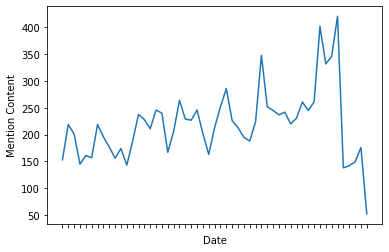

In [150]:
chart = sns.lineplot(x="Date", y="Mention Content",
                  markers=True, dashes=False, data=datePlot)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [143]:
full

,index,Date,Mention Content,Mention Clean,connection,access,promotion,homework,wellbeing,tuition,effective,lazy,irritated,joy,sad
0,0,2020-05-18,My ultimate lodi filmmaker Juan Pula Staying a...,ultimate lodi filmmaker juan pula staying home...,0,0,0,0,0,0,0,0,0,0,0
1,1,2020-05-18,jst had a horrific time picking up food from t...,jst horrific time picking food tesco masses sc...,0,0,0,0,0,0,0,0,0,0,0
2,2,2020-05-18,Late Upload of our School Intrams Parlor Games...,late upload school intrams parlor games day pa...,0,0,0,0,0,0,0,0,0,0,0
3,3,2020-05-18,Isnt antibodytesting the key to getting kids b...,isnt antibodytesting key getting kids back sch...,0,0,0,1,0,0,0,0,0,0,0
4,4,2020-05-18,billieeilish We would your help sharing this v...,billieeilish would help sharing video thisismy...,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11649,1382,2020-05-23,how's the new normal now for students:\n\nsee ...,hows the new normal now for students see u sa ...,0,0,0,0,0,0,0,0,0,0,0
11650,1385,2020-05-23,Max na siguro 1hour para sa online class ni Lori.,max na siguro 1hour para sa online class ni lori,0,0,0,0,0,0,0,0,0,0,0
11651,1387,2020-05-23,Online Class = Online Stress,online class online stress,0,0,0,0,0,0,0,0,0,0,0
11652,1390,2020-05-23,Ang nangyayare at mangyayare naman e hindi onl...,ang nangyayare at mangyayare naman e hindi onl...,0,0,0,1,0,0,0,0,0,0,0
